In [213]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tweepy
from tweepy import OAuthHandler
import json
import ast
from timeit import default_timer as timer
from PIL import Image
from wordcloud import STOPWORDS

from wordcloud import WordCloud
import requests
pd.set_option("display.max_colwidth", None)

%matplotlib inline
sns.set()

# Data Gathering

In [2]:
twitter_archive = pd.read_csv("twitter-archive-enhanced.csv")

In [3]:
twitter_archive.sample(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
1827,676430933382295552,NaN,NaN,2015-12-14 15:57:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Duke. He's an Urban Parmesan. They know he's scared of the green rubber dog. ""Why u do dis?"" thinks Duke. 10/10 https://t.co/3bim9U5Idr",NaN,NaN,NaN,https://twitter.com/dog_rates/status/676430933382295552/photo/1,10,10,Duke,None,None,None,None
1472,693942351086120961,NaN,NaN,2016-01-31 23:42:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Kobe. He's a Speckled Rorschach. Requests that someone holds his hand during car rides. 10/10 sick interior https://t.co/LCA6Fr3X2M,NaN,NaN,NaN,https://twitter.com/dog_rates/status/693942351086120961/photo/1,10,10,Kobe,None,None,None,None
1460,695051054296211456,NaN,NaN,2016-02-04 01:07:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","Meet Brian (pronounced ""Kirk""). He's not amused by ur churlish tomfoolery. Once u put him down you're done for. 6/10 https://t.co/vityMwPKKi",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/695051054296211456/photo/1,https://twitter.com/dog_rates/status/695051054296211456/photo/1",6,10,Brian,None,None,None,None
1843,675853064436391936,NaN,NaN,2015-12-13 01:41:41 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have an entire platoon of puppers. Total score: 88/80 would pet all at once https://t.co/y93p6FLvVw,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/675853064436391936/photo/1,https://twitter.com/dog_rates/status/675853064436391936/photo/1",88,80,None,None,None,None,None
166,859924526012018688,NaN,NaN,2017-05-04 00:15:58 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Milky. She has no idea what happened. Just as pupset as you. Perhaps a sheep exploded. Even offered to help clean. 12/10 very good girl https://t.co/g8vpXFzw29,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859924526012018688/photo/1,12,10,Milky,None,None,None,None
745,780092040432480260,NaN,NaN,2016-09-25 17:10:10 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Hank. He's mischievous af. Doesn't even know what he was trying to do here. 8/10 quit the shit Hank damn https://t.c…,7.533757e+17,4.196984e+09,2016-07-13 23:48:51 +0000,https://twitter.com/dog_rates/status/753375668877008896/photo/1,8,10,Hank,None,None,None,None
2261,667549055577362432,NaN,NaN,2015-11-20 03:44:31 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Twitter Web Client</a>",Never seen dog like this. Breathes heavy. Tilts head in a pattern. No bark. Shitty at fetch. Not even cordless. 1/10 https://t.co/i9iSGNn3fx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667549055577362432/photo/1,1,10,None,None,None,None,None
2110,670444955656130560,NaN,NaN,2015-11-28 03:31:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Paull. He just stubbed his toe. 10/10 deep breaths Paull https://t.co/J5Mqn8VeYq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670444955656130560/photo/1,10,10,Paull,None,None,None,None
1464,694356675654983680,6.706684e+17,4.196984e+09,2016-02-02 03:08:26 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This pupper only appears through the hole of a Funyun. Much like Phineas, this one is also mysterious af. 10/10 https://t.co/SQsEBWxPyG",NaN,NaN,NaN,https://twitter.com/dog_rates/status/694356675654983680/photo/1,10,10,None,None,None,pupper,None
1949,673689733134946305,NaN,NaN,2015-12-07 02:25:23 +0000,"<a href=""http://twitter.com/download/iph

In [4]:
twitter_archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [5]:
twitter_archive.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [6]:
udacity_url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"

response = requests.get(udacity_url)



with open("image_predictions.tsv", mode = "wb") as file:
    file.write(response.content)

image_predictions = pd.read_csv("image_predictions.tsv", sep = "\t")

In [7]:
image_predictions.head(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [8]:
image_predictions.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1519,787717603741622272,https://pbs.twimg.com/media/Cu6I9vvWIAAZG0a.jpg,3,German_shepherd,0.992339,True,malinois,0.004920,True,kelpie,0.000853,True
1626,804026241225523202,https://pbs.twimg.com/media/Cyh5mQTW8AQpB6K.jpg,1,web_site,0.492709,False,envelope,0.050566,False,guillotine,0.015297,False
947,704761120771465216,https://pbs.twimg.com/media/CcfQgHVWoAAxauy.jpg,1,Siamese_cat,0.202294,False,Chihuahua,0.100418,True,basenji,0.072097,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
1966,867774946302451713,https://pbs.twimg.com/media/DAr0tDZXUAEMvdu.jpg,2,Border_collie,0.661953,True,Cardigan,0.175718,True,collie,0.087142,True


In [9]:
image_predictions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [10]:
image_predictions.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


## Reasons for not using Twitter's API:

After filling the API request form, informing the Twitter team of my intended use, I got an email asking me to restate what I needed the information on their API for and I was asked to be very specific.

As at then, I had no idea of how the data from the API would be presented and I hadn't fully worked out what sort of insights I wanted to glean from the data.


I responded to the mail but still got a similar response asking me to be more specific. By this time, 2 days had passed and I still had much I hadn't done, so I decided to opt for the alternate method.


As of the time of resending this submission, I have sent another request via mail to the Twitter Development team. If they give me access to use their API, I will adapt my code to use the API instead of the alternate method


## Edit:

- I have been able to acquire the keys and secrets from the Twitter Development team. My last request was granted.

In [11]:
#USE THIS IF YOU WANT TO USE TWITTER'S REAL API. UNCOMMENT THE CODE BELOW AND GET THE TWITTER API KEYS. THEN COMMENT OUT THE
#CODE GETTING THE DATA FROM THE UDACITY SERVER
consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [12]:
api

In [13]:
'''# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:
# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to
# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = twitter_archive.tweet_id.values
len(tweet_ids)

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepyException as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)'''

'# NOTE TO STUDENT WITH MOBILE VERIFICATION ISSUES:\n# df_1 is a DataFrame with the twitter_archive_enhanced.csv file. You may have to\n# change line 17 to match the name of your DataFrame with twitter_archive_enhanced.csv\n# NOTE TO REVIEWER: this student had mobile verification issues so the following\n# Twitter API code was sent to this student from a Udacity instructor\n# Tweet IDs for which to gather additional data via Twitter\'s API\ntweet_ids = twitter_archive.tweet_id.values\nlen(tweet_ids)\n\n# Query Twitter\'s API for JSON data for each tweet ID in the Twitter archive\ncount = 0\nfails_dict = {}\nstart = timer()\n# Save each tweet\'s returned JSON as a new line in a .txt file\nwith open(\'tweet_json.txt\', \'w\') as outfile:\n    # This loop will likely take 20-30 minutes to run because of Twitter\'s rate limit\n    for tweet_id in tweet_ids:\n        count += 1\n        print(str(count) + ": " + str(tweet_id))\n        try:\n            tweet = api.get_status(tweet_id, twee

In [14]:
'fails_dict'

'fails_dict'

In [15]:
'''print(f"There were {len(fails_dict)} failed attempts. File not found errors")
print(f"This implies that we expect just {len(twitter_archive) - len(fails_dict)} rows in the twitter API dataset")'''

'print(f"There were {len(fails_dict)} failed attempts. File not found errors")\nprint(f"This implies that we expect just {len(twitter_archive) - len(fails_dict)} rows in the twitter API dataset")'

In [16]:
#GETTING THE DATA FROM UDACITY SERVERS INSTEAD OF TWITTER'S API. THIS IS THE DEFAULT FOR THIS PROJECT BECAUSE IT HAS MORE
#DATA THAN THE TWITTER API BECAUSE SOME OF THE DATA HAS BEEN DELETED FROM TWITTER OR MOVED.
twitter_api_url = "https://video.udacity-data.com/topher/2018/November/5be5fb7d_tweet-json/tweet-json.txt"

response = requests.get(twitter_api_url)



with open("tweet_json.txt", mode = "wb") as file:
    file.write(response.content)

In [17]:
api_tweets = []

with open("tweet_json.txt", "r") as file:
    for line in file:
        api_tweets.append(json.loads(line))

In [18]:
print(f"There are {len(api_tweets)} tweets to fill up the rows of our Twitter API dataset")

There are 2354 tweets to fill up the rows of our Twitter API dataset


In [19]:
sample_tweet = api_tweets[6]
sample_tweet['favorite_count'], sample_tweet["retweet_count"]

(12041, 2158)

In [20]:
len(api_tweets[29].keys())

24

In [21]:
api_tweets[0]

{'created_at': 'Tue Aug 01 16:23:56 +0000 2017',
 'id': 892420643555336193,
 'id_str': '892420643555336193',
 'full_text': "This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU",
 'truncated': False,
 'display_text_range': [0, 85],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 892420639486877696,
    'id_str': '892420639486877696',
    'indices': [86, 109],
    'media_url': 'http://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg',
    'url': 'https://t.co/MgUWQ76dJU',
    'display_url': 'pic.twitter.com/MgUWQ76dJU',
    'expanded_url': 'https://twitter.com/dog_rates/status/892420643555336193/photo/1',
    'type': 'photo',
    'sizes': {'large': {'w': 540, 'h': 528, 'resize': 'fit'},
     'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 540, 'h': 528, 'resize': 'fit'},
     'medium': {'w': 

In [22]:
api_tweets[0]["entities"]["media"][0]["expanded_url"]

'https://twitter.com/dog_rates/status/892420643555336193/photo/1'

In [23]:
total_keys = api_tweets[0].keys()
list(total_keys)

['created_at',
 'id',
 'id_str',
 'full_text',
 'truncated',
 'display_text_range',
 'entities',
 'extended_entities',
 'source',
 'in_reply_to_status_id',
 'in_reply_to_status_id_str',
 'in_reply_to_user_id',
 'in_reply_to_user_id_str',
 'in_reply_to_screen_name',
 'user',
 'geo',
 'coordinates',
 'place',
 'contributors',
 'is_quote_status',
 'retweet_count',
 'favorite_count',
 'favorited',
 'retweeted',
 'possibly_sensitive',
 'possibly_sensitive_appealable',
 'lang']

In [24]:
num_keys = len(api_tweets[0].keys())
err_lines = {}
for i, tweet in enumerate(api_tweets):
    try:
        assert len(tweet.keys()) == num_keys
        
    except AssertionError as e:
        e = f"tweet number {i} has a different number of keys"
        tweet_keys = list(tweet.keys())
        err_lines[str(i)] = set(tweet_keys)^set(total_keys)
        
print(f"There are {len(err_lines)} lines with different number of keys")

There are 346 lines with different number of keys


In [25]:
err_lines

{'29': {'extended_entities',
  'possibly_sensitive',
  'possibly_sensitive_appealable'},
 '31': {'extended_entities',
  'quoted_status_id',
  'quoted_status_id_str',
  'retweeted_status'},
 '34': {'extended_entities',
  'quoted_status',
  'quoted_status_id',
  'quoted_status_id_str'},
 '35': {'retweeted_status'},
 '41': {'extended_entities',
  'quoted_status',
  'quoted_status_id',
  'quoted_status_id_str'},
 '54': {'extended_entities',
  'possibly_sensitive',
  'possibly_sensitive_appealable'},
 '63': {'extended_entities',
  'possibly_sensitive',
  'possibly_sensitive_appealable'},
 '67': {'extended_entities',
  'possibly_sensitive',
  'possibly_sensitive_appealable',
  'retweeted_status'},
 '71': {'extended_entities',
  'quoted_status',
  'quoted_status_id',
  'quoted_status_id_str'},
 '72': {'extended_entities',
  'possibly_sensitive',
  'possibly_sensitive_appealable',
  'retweeted_status'},
 '73': {'extended_entities',
  'possibly_sensitive',
  'possibly_sensitive_appealable',
  '

In [26]:
twitter_api_data_dict = {}
num_likes_list=[]
num_retweets_list=[]
tweet_id_list=[]
text_range_list = []
expanded_url_list = []

for i, tweet in enumerate(api_tweets):
    tweet_id_list.append(tweet['id'])
    
    num_likes_list.append(tweet['favorite_count'])
        
    num_retweets_list.append(tweet["retweet_count"])
    
    text_range_list.append(tweet["display_text_range"])
    
    print(f"The value of i is {i}")
    try:
        expanded_url_list.append(tweet["entities"]["media"][0]["expanded_url"])
    except KeyError as e:
        expanded_url_list.append(None)

    
    
    
twitter_api_data_dict["tweet_id"] = tweet_id_list
twitter_api_data_dict["num_likes"] = num_likes_list
twitter_api_data_dict["num_retweets"] = num_retweets_list
twitter_api_data_dict["display_text_range"] = text_range_list
twitter_api_data_dict["expanded_urls"] = expanded_url_list

len(twitter_api_data_dict)

The value of i is 0
The value of i is 1
The value of i is 2
The value of i is 3
The value of i is 4
The value of i is 5
The value of i is 6
The value of i is 7
The value of i is 8
The value of i is 9
The value of i is 10
The value of i is 11
The value of i is 12
The value of i is 13
The value of i is 14
The value of i is 15
The value of i is 16
The value of i is 17
The value of i is 18
The value of i is 19
The value of i is 20
The value of i is 21
The value of i is 22
The value of i is 23
The value of i is 24
The value of i is 25
The value of i is 26
The value of i is 27
The value of i is 28
The value of i is 29
The value of i is 30
The value of i is 31
The value of i is 32
The value of i is 33
The value of i is 34
The value of i is 35
The value of i is 36
The value of i is 37
The value of i is 38
The value of i is 39
The value of i is 40
The value of i is 41
The value of i is 42
The value of i is 43
The value of i is 44
The value of i is 45
The value of i is 46
The value of i is 47
Th

The value of i is 727
The value of i is 728
The value of i is 729
The value of i is 730
The value of i is 731
The value of i is 732
The value of i is 733
The value of i is 734
The value of i is 735
The value of i is 736
The value of i is 737
The value of i is 738
The value of i is 739
The value of i is 740
The value of i is 741
The value of i is 742
The value of i is 743
The value of i is 744
The value of i is 745
The value of i is 746
The value of i is 747
The value of i is 748
The value of i is 749
The value of i is 750
The value of i is 751
The value of i is 752
The value of i is 753
The value of i is 754
The value of i is 755
The value of i is 756
The value of i is 757
The value of i is 758
The value of i is 759
The value of i is 760
The value of i is 761
The value of i is 762
The value of i is 763
The value of i is 764
The value of i is 765
The value of i is 766
The value of i is 767
The value of i is 768
The value of i is 769
The value of i is 770
The value of i is 771
The value 

The value of i is 1283
The value of i is 1284
The value of i is 1285
The value of i is 1286
The value of i is 1287
The value of i is 1288
The value of i is 1289
The value of i is 1290
The value of i is 1291
The value of i is 1292
The value of i is 1293
The value of i is 1294
The value of i is 1295
The value of i is 1296
The value of i is 1297
The value of i is 1298
The value of i is 1299
The value of i is 1300
The value of i is 1301
The value of i is 1302
The value of i is 1303
The value of i is 1304
The value of i is 1305
The value of i is 1306
The value of i is 1307
The value of i is 1308
The value of i is 1309
The value of i is 1310
The value of i is 1311
The value of i is 1312
The value of i is 1313
The value of i is 1314
The value of i is 1315
The value of i is 1316
The value of i is 1317
The value of i is 1318
The value of i is 1319
The value of i is 1320
The value of i is 1321
The value of i is 1322
The value of i is 1323
The value of i is 1324
The value of i is 1325
The value o

The value of i is 2139
The value of i is 2140
The value of i is 2141
The value of i is 2142
The value of i is 2143
The value of i is 2144
The value of i is 2145
The value of i is 2146
The value of i is 2147
The value of i is 2148
The value of i is 2149
The value of i is 2150
The value of i is 2151
The value of i is 2152
The value of i is 2153
The value of i is 2154
The value of i is 2155
The value of i is 2156
The value of i is 2157
The value of i is 2158
The value of i is 2159
The value of i is 2160
The value of i is 2161
The value of i is 2162
The value of i is 2163
The value of i is 2164
The value of i is 2165
The value of i is 2166
The value of i is 2167
The value of i is 2168
The value of i is 2169
The value of i is 2170
The value of i is 2171
The value of i is 2172
The value of i is 2173
The value of i is 2174
The value of i is 2175
The value of i is 2176
The value of i is 2177
The value of i is 2178
The value of i is 2179
The value of i is 2180
The value of i is 2181
The value o

5

In [27]:
tweet

{'created_at': 'Sun Nov 15 22:32:08 +0000 2015',
 'id': 666020888022790149,
 'id_str': '666020888022790149',
 'full_text': 'Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj',
 'truncated': False,
 'display_text_range': [0, 131],
 'entities': {'hashtags': [],
  'symbols': [],
  'user_mentions': [],
  'urls': [],
  'media': [{'id': 666020881337073664,
    'id_str': '666020881337073664',
    'indices': [108, 131],
    'media_url': 'http://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'media_url_https': 'https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg',
    'url': 'https://t.co/BLDqew2Ijj',
    'display_url': 'pic.twitter.com/BLDqew2Ijj',
    'expanded_url': 'https://twitter.com/dog_rates/status/666020888022790149/photo/1',
    'type': 'photo',
    'sizes': {'thumb': {'w': 150, 'h': 150, 'resize': 'crop'},
     'small': {'w': 340, 'h': 255, 'resize': 'fit'},
     'medium': {'w': 600, 'h': 450, 'resize': 'fit

In [28]:
api_df = pd.DataFrame(twitter_api_data_dict)
api_df.head()

,tweet_id,num_likes,num_retweets,display_text_range,expanded_urls
0,892420643555336193,39467,8853,"[0, 85]",https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,33819,6514,"[0, 138]",https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,25461,4328,"[0, 121]",https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,42908,8964,"[0, 79]",https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,41048,9774,"[0, 138]",https://twitter.com/dog_rates/status/891327558926688256/photo/1


In [29]:
api_df.sample(5)

,tweet_id,num_likes,num_retweets,display_text_range,expanded_urls
927,754482103782404096,5852,2220,"[0, 56]",https://twitter.com/dog_rates/status/754482103782404096/video/1
1069,740214038584557568,7335,2220,"[0, 115]",https://twitter.com/dog_rates/status/740214038584557568/photo/1
1572,687480748861947905,1760,281,"[0, 56]",https://twitter.com/dog_rates/status/687480748861947905/photo/1
1459,694925794720792577,2965,1043,"[0, 125]",None
1955,673583129559498752,1273,403,"[0, 137]",https://twitter.com/dog_rates/status/673583129559498752/photo/1


In [30]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   tweet_id            2354 non-null   int64 
 1   num_likes           2354 non-null   int64 
 2   num_retweets        2354 non-null   int64 
 3   display_text_range  2354 non-null   object
 4   expanded_urls       2073 non-null   object
dtypes: int64(3), object(2)
memory usage: 92.1+ KB


In [31]:
api_df.describe()

,tweet_id,num_likes,num_retweets
count,2.354000e+03,2354.000000,2354.000000
mean,7.426978e+17,8080.968564,3164.797366
std,6.852812e+16,11814.771334,5284.770364
min,6.660209e+17,0.000000,0.000000
25%,6.783975e+17,1415.000000,624.500000
50%,7.194596e+17,3603.500000,1473.500000
75%,7.993058e+17,10122.250000,3652.000000
max,8.924206e+17,132810.000000,79515.000000


# Data Assessment

### Visual Assessment
In the data gathering phase, we made some observations about the 3 datasets. They are:
- The columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, have about 3 - 8% of their data available. This implies that removing them from the final dataset is important.

- The 3 datasets have the tweet_id column in common. This means that we can combine the tables using this column.

- The structure of the source column is not elegant.

- The dog stage is split into 4 different columns

- The dog breeds (i.e. p1 column) in the image_predictions dataset have lowercase and uppercase text.

### Programmatic Assessment
The remaining data assessment steps will be done programmatically. Each assessment will be recorded along side the code. A summary of these programmatic assessment steps and the visual assessements will be given at the bottom of this chapter.

First, the **twitter_archive_enhanced (or twitter_archive)** dataset is assessed, then the **image_predictions** dataset, after which we wrap up with the **twitter_api** dataset.

In [32]:
#ASSESSING twitter_archive DATASET
twitter_archive.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
895,759159934323924993,NaN,NaN,2016-07-29 22:53:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: AT DAWN...\nWE RIDE\n\n11/10 https://t.co/QnfO7HEQGA,6.703191e+17,4.196984e+09,2015-11-27 19:11:49 +0000,"https://twitter.com/dog_rates/status/670319130621435904/photo/1,https://twitter.com/dog_rates/status/670319130621435904/photo/1",11,10,None,None,None,None,None
109,871166179821445120,NaN,NaN,2017-06-04 00:46:17 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Dawn. She's just checking pup on you. Making sure you're doing okay. 12/10 she's here if you need her https://t.co/X…,8.410770e+17,4.196984e+09,2017-03-13 00:02:39 +0000,https://twitter.com/dog_rates/status/841077006473256960/photo/1,12,10,Dawn,None,None,None,None
1129,729463711119904772,NaN,NaN,2016-05-09 00:11:16 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Pupcasso. You can't afford his art. 13/10 talented af https://t.co/f2VUpy4WO0,NaN,NaN,NaN,https://twitter.com/dog_rates/status/729463711119904772/photo/1,13,10,Pupcasso,None,None,None,None
994,748568946752774144,NaN,NaN,2016-06-30 17:28:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Cora. She rings a bell for treats. 12/10 precious af (vid by @skyehellenkamp) https://t.co/uUncaAGH18,NaN,NaN,NaN,https://twitter.com/dog_rates/status/748568946752774144/video/1,12,10,Cora,None,None,None,None
1086,738166403467907072,NaN,NaN,2016-06-02 00:32:39 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Axel. He's a professional leaf catcher. 12/10 gifted af https://t.co/P8bgOMMTRs,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1,https://twitter.com/dog_rates/status/738166403467907072/photo/1",12,10,Axel,None,None,None,None


In [33]:
#checking for unique tweets
duplicated_tweets = twitter_archive["tweet_id"].duplicated().sum()
print(f"There are {duplicated_tweets} duplicated tweets in this dataset")

There are 0 duplicated tweets in this dataset


In [34]:
#Checking the datatype of the timestamp field.

twitter_archive["timestamp"].dtype

dtype('O')

- This implies that this column is String. We must change the timestamp column's datatype from Object to datetime object

In [35]:
#Checking the expanded url columns
no_url = twitter_archive[twitter_archive["expanded_urls"].isna()].reset_index(drop= True)
print(f"There are {len(no_url)} records with no urls\n\n")

There are 59 records with no urls




In [36]:
#This allows us to check if we can find the expanded urls for the tweets without expanded urls using the api_df dataset
intersect = api_df.merge(no_url, on = "tweet_id", how = "inner")

intersect["tweet_id"].reset_index(drop=True).equals(no_url["tweet_id"].reset_index(drop=True))

True

**Comment**: This implies that there is no way of getting the missing expanded urls.

In [37]:
#Checking the Ratings Numerator column
twitter_archive["rating_numerator"].value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

**Comment**: There are some really large ratings (>14) and some really small ratings (<4). They would be worth investigating

In [38]:
#Investigating numerator ratings greater than 14
twitter_archive.loc[twitter_archive["rating_numerator"]>14, ["tweet_id", "text", "rating_numerator"]]

,tweet_id,text,rating_numerator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17
188,855862651834028034,@dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research,420
189,855860136149123072,"@s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10",666
285,838916489579200512,RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI,15
290,838150277551247360,@markhoppus 182/10,182
291,838085839343206401,@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10,15
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,84
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,24


**Comment**: From the above table, we observe that the reasons for really large ratings are:
1. The user was not talking about any dog in particular. These are the tweets that are replies to other tweets. these can be observed in the "in_reply_to_status_id, retweeted_status_id, retweeted_status_user_id, in_reply_to_user_id" columns. 

2. Some people have rated more than one dog and have multiplied both numerator and denominator by the number of dogs rated.

3. Some rated their dogs with decimals as numerators. But only the tenths and hundredths values of the decimal have been recorded.

4. Tweet with id "810984652412424192" did not tweet a rating. He/She only mentioned 24/7 which refers to day and time not a rating.

5. There are some tweets like the one in row 313 with seemingly double ratings. This should be investigated as the wrong value was recorded in the ratings columns.

- Correct the wrongly inputted decimal ratings and other rating issues

In [39]:
twitter_archive.loc[twitter_archive["rating_numerator"]<5, ["tweet_id", "text", "rating_numerator"]]

,tweet_id,text,rating_numerator
315,835152434251116546,When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag,0
605,798576900688019456,RT @dog_rates: Not familiar with this breed. No tail (weird). Only 2 legs. Doesn't bark. Surprisingly quick. Shits eggs. 1/10 https://t.co/…,1
765,777885040357281792,This is Wesley. He's clearly trespassing. Seems rather h*ckin violent too. Weaponized forehead. 3/10 wouldn't let in https://t.co/pL7wbMRW7M,3
883,760252756032651264,This is Fido. He can tell the weather. Not good at fetch tho. Never comes when called. 4/10 would probably still pet https://t.co/4gOv2Q3iKP,4
912,757596066325864448,Here's another picture without a dog in it. Idk why you guys keep sending these. 4/10 just because that's a neat rug https://t.co/mOmnL19Wsl,4
1004,747816857231626240,Viewer discretion is advised. This is a terrible attack in progress. Not even in water (tragic af). 4/10 bad sherk https://t.co/L3U0j14N5R,4
1016,746906459439529985,"PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX",0
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4
1189,718246886998687744,This is Alexanderson. He's got a weird ass birth mark. Dreadful at fetch. Won't eat kibble. 3/10 wtf @Target https://t.co/FmxOpf2Sgl,3
1219,714631576617938945,This is Benedict. He's a feisty pup. Needs a brushing. Portable af. Looks very angry actually. 4/10 might not pet https://t.co/3oeFfHjv0Z,4


The tweets with ids of 835152434251116546, 798576900688019456, 757596066325864448, and so on are not a ratings for dogs

- Remove all tweets that are not dog ratings

In [40]:
twitter_archive["rating_denominator"].value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

**Comment**: The predominant trend in this column is that the rating is either 10 or greater. It would therefore be worthwile to investigate ratings greater than 10

In [41]:
twitter_archive.loc[twitter_archive["rating_denominator"]>10, ["tweet_id", "text", "rating_denominator"]]

,tweet_id,text,rating_denominator
342,832088576586297345,@docmisterio account started on 11/15/15,15
433,820690176645140481,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",11
902,758467244762497024,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11
1120,731156023742988288,Say hello to this unbelievably well behaved squad of doggos. 204/170 would try to pet all at once https://t.co/yGQI3He3xv,170
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50
1228,713900603437621249,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90
1254,710658690886586372,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80


**Comment**: The tweet with id of 832088576586297345	is not dog rating. The others are alright only that some have values that are similar to the rating format and this affected the way the rating is entered.

Majority of the large denominators are as a result of multiplying the numerator and denominator by the number of dogs Some of the large denominators are as a result of reading the wrong values

 - Remove the non-dog rating tweet and fix the wrong ratings

In [42]:
twitter_archive.loc[twitter_archive["rating_denominator"]<10, ["tweet_id", "text", "rating_denominator"]]

,tweet_id,text,rating_denominator
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",0
516,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7
2335,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2


**Comment**: The recurrent problem of before: Correct the recorded rating and also remove the tweet with the rating of 24/7 because it is not a real rating (This corresponds to tweet_id 810984652412424192	

In [43]:
#This code allows us to see where there are double ratings
double_rating = twitter_archive["text"].str.findall("\d+\/\d+").apply(lambda x: len(x)> 1)
twitter_archive.loc[double_rating, ["tweet_id", "text", "rating_numerator", "rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,17,10
313,835246439529840640,"@jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho",960,0
561,802624713319034886,"RT @dog_rates: ""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
766,777684233540206592,"""Yep... just as I suspected. You're not flossing."" 12/10 and 11/10 for the pup not flossing https://t.co/SuXcI9B7pQ",12,10
784,775096608509886464,"RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…",9,11
860,763167063695355904,RT @dog_rates: Meet Eve. She's a raging alcoholic 8/10 (would b 11/10 but pupper alcoholism is a tragic issue that I can't condone) https:/…,8,10
1007,747600769478692864,This is Bookstore and Seaweed. Bookstore is tired and Seaweed is an asshole. 10/10 and 7/10 respectively https://t.co/eUGjGjjFVJ,10,10
1068,740373189193256964,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",9,11
1165,722974582966214656,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,4,20
1202,716439118184652801,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,50


- Choose the correct rating from the two formats given in the tweets

In [44]:
#THIS CODE WILL HELP US FIND ALL THE DECIMAL RATINGS
def find_decimal_ratings(df):
    import re
    regex = re.compile(r"\d+\.\d+\/\d+")
    return len(regex.findall(df))

twitter_archive.loc[twitter_archive.text.apply(find_decimal_ratings) > 0, ["tweet_id", "text", "rating_numerator",
                                                                          "rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
45,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,10
340,832215909146226688,"RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wu…",75,10
695,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,10
763,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,10
1689,681340665377193984,I've been told there's a slight possibility he's checking his mirror. We'll bump to 9.5/10. Still a menace,5,10
1712,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,10


**Comment**: The errors here are as a result of reading the wrong values where the ratings are decimals

- Replace the ratings with the correct decimal ratings

In [45]:
#Assessing dog names
twitter_archive["name"].unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

**Comment**: There appears to be some names that are not dog names. They stand out because their first letters are not capitalized. There is also a dog name shortened to just the letter "O"

In [46]:
#The portions of the dataset that do not have real dog names
twitter_archive.loc[twitter_archive["name"].str.islower(), ["tweet_id", "text", "name"]]

,tweet_id,text,name
22,887517139158093824,I've yet to rate a Venezuelan Hover Wiener. This is such an honor. 14/10 paw-inspiring af (IG: roxy.thedoxy) https://t.co/20VrLAA8ba,such
56,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
118,869988702071779329,RT @dog_rates: We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10…,quite
169,859196978902773760,We only rate dogs. This is quite clearly a smol broken polar bear. We'd appreciate if you only send dogs. Thank you... 12/10 https://t.co/g2nSyGenG9,quite
193,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
...,...,...,...
2349,666051853826850816,This is an odd dog. Hard on the outside but loving on the inside. Petting still fun. Doesn't play catch well. 2/10 https://t.co/v5A4vzSDdc,an
2350,666050758794694657,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,a
2352,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
2353,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a


**Comment**: There are about 110 rows with dog name issues

In [47]:
#These wrong dog names can be seen below
dog_names = list(twitter_archive["name"].unique())
wrong_names = []
for name in dog_names:
    if name[0].islower():
        print(name)
        wrong_names.append(name)
    if len(name) <=1:
        print(name)
        wrong_names.append(name)

such
a
a
quite
not
one
incredibly
mad
an
very
O
just
my
his
actually
getting
this
unacceptable
all
old
infuriating
the
by
officially
life
light
space


In [48]:
print(f"There are {len(dog_names) - len(wrong_names)} unique dog names in the dataset")

There are 930 unique dog names in the dataset


**Comment**: Some words in the name column are not real names. The real names all appear to start with Capital letters. This means we can filter out the bad names using this criterion.

- Replace non-dog names with their real names where possible

In [49]:
#ASSESSING image_predictions DATASET
image_predictions.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [50]:
image_predictions["p1_dog"].value_counts()/len(image_predictions) * 100

True     73.831325
False    26.168675
Name: p1_dog, dtype: float64

In [51]:
#This checks for the number of tweets without images
twitter_archive.loc[~twitter_archive["tweet_id"].isin(image_predictions["tweet_id"]), ["tweet_id", "text",
                                                                                      "expanded_urls"]]

,tweet_id,text,expanded_urls
30,886267009285017600,@NonWhiteHat @MayhewMayhem omg hello tanner you are a scary good boy 12/10 would pet with extreme caution,NaN
32,886054160059072513,RT @Athletics: 12/10 #BATP https://t.co/WxwJmvjfxo,"https://twitter.com/dog_rates/status/886053434075471873,https://twitter.com/dog_rates/status/886053434075471873"
35,885518971528720385,I have a new hero and his name is Howard. 14/10 https://t.co/gzLHboL7Sk,https://twitter.com/4bonds2carbon/status/885517367337512960
42,884247878851493888,OMG HE DIDN'T MEAN TO HE WAS JUST TRYING A LITTLE BARKOUR HE'S SUPER SORRY 13/10 WOULD FORGIVE IMMEDIATE https://t.co/uF3pQ8Wubj,https://twitter.com/kaijohnson_19/status/883965650754039809
55,881633300179243008,@roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s,NaN
...,...,...,...
2038,671550332464455680,After 22 minutes of careful deliberation this dog is being demoted to a 1/10. The longer you look at him the more terrifying he becomes,NaN
2149,669684865554620416,After countless hours of research and hundreds of formula alterations we have concluded that Dug should be bumped to an 11/10,NaN
2189,668967877119254528,12/10 good shit Bubka\n@wane15,NaN
2212,668587383441514497,Never forget this vine. You will not stop watching for at least 15 minutes. This is the second coveted.. 13/10 https://t.co/roqIxCvEB3,https://vine.co/v/ea0OwvPTx9l


**Comment**: There are 281 tweets without images. These will be removed to meet specifications

About 26% of the dataset are not dogs. They need to be removed

- There are some pictures that are not dogs. They need to be removed from the final dataset
- There are 3 prediction confidence columns. We need just 1: the best prediction.

In [52]:
#ASSESSSING twitter_api DATASET
api_df.head()

,tweet_id,num_likes,num_retweets,display_text_range,expanded_urls
0,892420643555336193,39467,8853,"[0, 85]",https://twitter.com/dog_rates/status/892420643555336193/photo/1
1,892177421306343426,33819,6514,"[0, 138]",https://twitter.com/dog_rates/status/892177421306343426/photo/1
2,891815181378084864,25461,4328,"[0, 121]",https://twitter.com/dog_rates/status/891815181378084864/photo/1
3,891689557279858688,42908,8964,"[0, 79]",https://twitter.com/dog_rates/status/891689557279858688/photo/1
4,891327558926688256,41048,9774,"[0, 138]",https://twitter.com/dog_rates/status/891327558926688256/photo/1


In [53]:
print(f"This dataset contains {api_df.shape[0]} rows and {api_df.shape[1]} columns")

This dataset contains 2354 rows and 5 columns


In [54]:
#The rows that are present in the api_df dataset but absent from the twitter_archive dataset
twitter_archive[~twitter_archive["tweet_id"].isin(api_df["tweet_id"])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @dog_rates: This is Canela. She attempted some fancy porch pics. They were unsuccessful. 13/10 someone help her https://t.co/cLyzpcUcMX,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,"https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1,https://twitter.com/dog_rates/status/887473957103951883/photo/1",13,10,Canela,None,None,None,None
815,771004394259247104,NaN,NaN,2016-08-31 15:19:06 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",RT @katieornah: @dog_rates learning a lot at college 12/10 for my professor thank u for the pupper slides https://t.co/nTFDr99hg0,7.710021e+17,1.732729e+09,2016-08-31 15:10:07 +0000,"https://twitter.com/katieornah/status/771002130450743296/photo/1,https://twitter.com/katieornah/status/771002130450743296/photo/1",12,10,None,None,None,pupper,None


**Comment**: The absent tweets above are actually retweets. To meet specification, we should remove these

In [55]:
#The expanded_urls column is already in the twitter_archive dataset so it can be dropped here
api_df = api_df.drop(["expanded_urls"], axis = 1)
api_df.head()

,tweet_id,num_likes,num_retweets,display_text_range
0,892420643555336193,39467,8853,"[0, 85]"
1,892177421306343426,33819,6514,"[0, 138]"
2,891815181378084864,25461,4328,"[0, 121]"
3,891689557279858688,42908,8964,"[0, 79]"
4,891327558926688256,41048,9774,"[0, 138]"


- The display_text_range is a list. We only need the maximum number of characters of each tweet.

## Data Assessment Summary

The following are the Data Assessment issues to be addressed:



### Visual Assessment

#### Data Quality

- The columns in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp, have about 3 - 8% of their data available. This implies that removing them from the final dataset is important.

- The structure of the source column is not elegant.


#### Tidiness
- The 3 datasets have the tweet_id column in common. This means that we can combine the tables using this column.

- The dog stage is split into 4 different columns



### Programmatic Assessment

#### Data Quality

- We must change the timestamp column's datatype from Object to datetime object

- Correct the wrongly inputted decimal ratings and other rating issues 

- Remove all tweets that are not original dog ratings i.e. replies and retweets. These are all identified by the in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id,retweeted_status_timestamp columns

- Replace non-dog names with their real names where possible

- There are some pictures that are not dogs. They need to be removed from the final dataset

- There are 3 prediction confidence columns. We need just 1: the best prediction.

- The dog breeds are not uniform. Some are completely lowercase while others have their first letter capitalized.

- The structure of the source column is not elegant.

- The display_text_range is a list. We only need the maximum number of characters of each tweet.

- Not all the column names have intuitive meaning

- The data type of the tweet_id is integer. We need it as a string





In all, we have 12 Data Quality issues, and 2 Data Tidiness issues to deal with

# Data Cleaning

The best way to approach this cleaning exercise is to combine all 3 datasets first before cleaning. This is so that any change based on one of the datasets will automatically reflect on the others. This will help to ensure data integrity an help avoid any data merging issues that may arise later.

Before we proceed though, we must create copies of these datasets for records purposes.

In [56]:
#Creating copies
twitter_archive_cp = twitter_archive.copy()
image_predictions_cp = image_predictions.copy()
api_df_cp = api_df.copy()

To meet specification, we are required to have tweets with only images within the dataset. The merging of the datasets with the image_predictions dataset will help with this as all the available images are on the image_predictions datasets.

Let the Cleaning Begin!

**Define**: Merge all 3 dataset copies into 1 dataframe

**Code**:

In [57]:
#Merging the 3 dataset copies into 1.
df_merged = pd.merge(pd.merge(twitter_archive_cp, image_predictions_cp), api_df_cp)
df_merged_cp = df_merged.copy() #Creating an extra copy of the merged dataset before cleaning
df_merged.reset_index(drop = True, inplace = True)


**Test**:

In [58]:
df_merged.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,num_likes,num_retweets,display_text_range
332,822610361945911296,NaN,NaN,2017-01-21 01:02:48 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Please stop sending in non-canines like this Very Pettable Dozing Bath Tortoise. We only rate dogs. Only send dogs... 12/10 https://t.co/mcagPeENIh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/822610361945911296/photo/1,...,True,Norfolk_terrier,0.075089,True,Norwich_terrier,0.059644,True,16327,3423,"[0, 123]"
1806,670804601705242624,NaN,NaN,2015-11-29 03:20:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Mason. He's a total frat boy. Pretends to be Hawaiian. Head is unbelievably round. 10/10 would pet so damn well https://t.co/DM3ZP3AA7b,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670804601705242624/photo/1,...,True,Pekinese,0.090129,True,chow,0.021722,True,2098,1035,"[0, 140]"
279,831309418084069378,NaN,NaN,2017-02-14 01:09:44 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Scooter and his son Montoya. Scooter is a wonderful father. He takes very good care of Montoya. Both 12/10 would pet at same time https://t.co/ghqMfxxa4V,NaN,NaN,NaN,https://twitter.com/dog_rates/status/831309418084069378/photo/1,...,True,kelpie,0.132449,True,Labrador_retriever,0.074727,True,12819,2786,"[0, 138]"
847,744995568523612160,NaN,NaN,2016-06-20 20:49:19 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Abby. She got her face stuck in a glass. Churlish af. 9/10 rookie move puppo https://t.co/2FPb45NXrK,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/744995568523612160/photo/1,https://twitter.com/dog_rates/status/744995568523612160/photo/1",...,True,Shih-Tzu,0.146336,True,Tibetan_terrier,0.134269,True,3277,716,"[0, 84]"
1466,679877062409191424,NaN,NaN,2015-12-24 04:11:37 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Penelope. She's a bacon frise. Total babe (lol get it like the movie). Doesn't bark tho. 5/10 very average dog https://t.co/SDcQYg0HSZ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/679877062409191424/photo/1,...,False,hay,0.060178,False,lumbermill,0.016483,False,2155,726,"[0, 139]"


In [59]:
print(f"There are now {len(df_merged.columns)} columns in the merged dataframe. The columns are:\n\n{df_merged.columns}")

There are now 31 columns in the merged dataframe. The columns are:

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf',
       'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'num_likes', 'num_retweets',
       'display_text_range'],
      dtype='object')


**Comment**: Notice that the 218 rows without images have been removed along with the extra two rows from the api_df dataset not in the twitter_archive dataset

**Define**: 

- Change the format of the timestamp column from "Object" to "datetime"

**Code**:

In [60]:
#Changing the format of the timestamp column from string to datetime
df_merged["timestamp"] = pd.to_datetime(df_merged["timestamp"], format = "%Y-%m-%d %H:%M:%S")

**Test**:

In [61]:
print(f"The new timestamp format is:\n\n {df_merged['timestamp'].dtype}")

The new timestamp format is:

 datetime64[ns, UTC]


**Define**: 

- Create a column for the length of tweet

- Drop the display_text_range column

**Code**:

In [62]:
#Creating a column for the length of the tweet i.e. the number of characters and then dropping the display_text_range column
df_merged["tweet_length"] = df_merged["display_text_range"].apply(lambda x: x[1])
df_merged = df_merged.drop(["display_text_range"], axis = 1)


**Test**:

In [63]:
"display_text_range" in df_merged.columns

False

**Define**:

- Remove all tweets that are not for dogs.

- Remove all prediction columns except the first and best prediction

**Code**:

In [64]:
#Removing all tweets that are not for dogs and removing all the prediction columns except the first and best prediction
df_merged = df_merged[df_merged["p1_dog"]].drop(["p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"], axis = 1)

In [65]:
#We should reset the index of the dataframe since we have only chosen certain rows that have dog pictures
df_merged.reset_index(drop = True, inplace = True)

**Test**:

In [66]:
set(["p2", "p2_conf", "p2_dog", "p3", "p3_conf", "p3_dog"]).issubset(set(df_merged.columns))

False

After this step, the number of tweets drastically drop to 1531 from 2073 implying that about 542 images sent were not dog images

**Define**:
    
- Drop p1_dog column since all the images left are those of dogs alone.

**Code**:

In [67]:
#Drop p1_dog column since all the images are now images of dogs
df_merged.drop("p1_dog", axis = 1, inplace = True)

**Test**:

In [68]:
print(f"The columns left are \n\n{df_merged.columns}")

The columns left are 

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'num_likes', 'num_retweets',
       'tweet_length'],
      dtype='object')


**Define**:

- Making the source column more elegant

**Code**:

In [69]:
#Rewriting the source column to be more elegant. It takes the value in the source by splitting using the ">" and "<" holding the source value in the anchor tag
#This code allows us to check the number of tweet sources
print("The following columns are to be expected after solving this issue\n")
df_merged["source"].str.split(">").str[1].str.split("<").str[0].value_counts()

The following columns are to be expected after solving this issue



Twitter for iPhone    1505
Twitter Web Client      19
TweetDeck                7
Name: source, dtype: int64

In [70]:
df_merged["source"] = df_merged["source"].str.split(">").str[1].str.split("<").str[0]

**Test**:

In [71]:
df_merged["source"].unique()

array(['Twitter for iPhone', 'Twitter Web Client', 'TweetDeck'],
      dtype=object)

In [72]:
df_merged.columns

Index(['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp',
       'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id',
       'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator',
       'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo',
       'jpg_url', 'img_num', 'p1', 'p1_conf', 'num_likes', 'num_retweets',
       'tweet_length'],
      dtype='object')

**Define**: 

- Create a single column for all the dog stages called dog_stage

- Drop the doggo, pupper, floofer, and puppo

**Code**:

In [73]:
#Creating a function to combine the dog stages.

def create_dog_stage(df):
    df["dog_stage"] = "None"
    dog_stages = ("pupper", "doggo", "puppo", "floofer")   
    for stage in dog_stages:
        df["dog_stage"] = np.where(df["dog_stage"] == "None", df[stage], df["dog_stage"])
        df.drop([stage], axis = 1, inplace = True)
    
        
    return df

df_merged = create_dog_stage(df_merged)

In [74]:
df_merged["dog_stage"].value_counts()

None       1294
pupper      158
doggo        53
puppo        19
floofer       7
Name: dog_stage, dtype: int64

In [75]:
#Handle the missing values by substituting "None" with np.nan. This removes "None" from the value_counts result
df_merged["dog_stage"] = df_merged["dog_stage"].apply(lambda x: np.nan if (x == "None") else x)

**Test**:

In [76]:
set(("pupper", "doggo", "puppo", "floofer")).issubset(set(df_merged.columns))

False

In [77]:
df_merged["dog_stage"].value_counts()

pupper     158
doggo       53
puppo       19
floofer      7
Name: dog_stage, dtype: int64

**Define**: 

- Dealing with columns with decimal ratings

In [78]:
#The columns with decimal rating
df_merged.loc[df_merged.text.apply(find_decimal_ratings) > 0, ["text", "rating_numerator"]]

,text,rating_numerator
36,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5
446,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75
491,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27
1122,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26


**Code**:

In [79]:
#USE THIS TO CREATE NEW RATING SYSTEM.
#This rating system will contain both the decimal ratings as well as the 1 or more rating format in the tweets. For example,
#If a tweet contains 10/10 and 17/10, this system will extract both ratings

def fix_ratings(df):
    import re
    regex = re.compile(r"\d*?[\.\d+]/\d+|\d+\.\d+\/\d+")
    return regex.findall(df)
    

df_merged["new_rating"] = df_merged["text"].apply(fix_ratings).to_frame()

In [80]:
#Changing the list values in the new_ratings column to single values by picking the the value at index 0. 
#If the new_rating cell contains more than one value in the list, then the second value is chosen. This is because it was
#observed that the second value in the list is the correct rating.

df_merged["new_rating"] = df_merged["new_rating"].apply(lambda x: x[1] if (len(x)> 1) else x[0])

**Test**:

In [81]:
print(f"There are {df_merged['new_rating'].isnull().sum()} null values in the new_rating column")

There are 0 null values in the new_rating column


In [82]:
df_merged.loc[df_merged.text.apply(find_decimal_ratings) > 0, ["text", "rating_numerator", "new_rating"]]

,text,rating_numerator,new_rating
36,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,13.5/10
446,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,9.75/10
491,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,11.27/10
1122,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,11.26/10


In [83]:
df_merged.loc[df_merged["rating_denominator"] < 10, ["tweet_id", "text", "rating_denominator", "new_rating"]]

,tweet_id,text,rating_denominator,new_rating
329,810984652412424192,Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx,7,24/7
1514,666287406224695296,This is an Albanian 3 1/2 legged Episcopalian. Loves well-polished hardwood flooring. Penis on the collar. 9/10 https://t.co/d9NcXFKwLv,2,9/10


**Comment**: Row 329 still has an issue with its rating. The rating given is not actually a rating. Thus, the row should be removed. We can note the tweet_id for when we remove the row

In [84]:
df_merged.loc[df_merged["rating_denominator"] > 10, ["text", "rating_denominator", "new_rating"]]

,text,rating_denominator,new_rating
274,The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd,70,84/70
585,Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE,150,165/150
687,"After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https://t.co/XAVDNDaVgQ",11,14/10
756,Happy 4/20 from the squad! 13/10 for all https://t.co/eV1diwds8a,20,13/10
784,This is Bluebert. He just saw that both #FinalFur match ups are split 50/50. Amazed af. 11/10 https://t.co/Kky1DPG4iq,50,11/10
802,Happy Saturday here's 9 puppers on a bench. 99/90 good work everybody https://t.co/mpvaVxKmc1,90,99/90
816,Here's a brigade of puppers. All look very prepared for whatever happens next. 80/80 https://t.co/0eb7R1Om12,80,80/80
832,"From left to right:\nCletus, Jerome, Alejandro, Burp, &amp; Titson\nNone know where camera is. 45/50 would hug all at once https://t.co/sedre1ivTK",50,45/50
883,Here is a whole flock of puppers. 60/50 I'll take the lot https://t.co/9dpcw6MdWa,50,60/50
943,Happy Wednesday here's a bucket of pups. 44/40 would pet all at once https://t.co/HppvrYuamZ,40,44/40


**Comment**: There does not seem to be any issues except with row 329 which will be dropped in the next cell

**Define**:

- Remove row 329 as it does not contain a real rating.

**Code**:

In [85]:
#Dropping the row 329 because it does not contain a real rating
#Reset the index after removing a row for consistent dataframe indexing

df_merged = df_merged.drop(329)
df_merged.reset_index(drop = True, inplace = True)

**Test**:

In [86]:
df_merged.loc[329, ["tweet_id", "text", "new_rating"]].to_frame()

,329
tweet_id,810896069567610880
text,"This is Hunter. He just found out he needs braces. Requesting an orthodogtist stat. 11/10 you're fine Hunter, everything's fine https://t.co/zW1o0W4AYV"
new_rating,11/10


Notice that the tweet_id of row 329 has changed. It used to be 810984652412424192

In [87]:
print(f"The new shape of our dataframe is {df_merged.shape}")

The new shape of our dataframe is (1530, 22)


**Define**

- Create new rating_numerator column

- Create new rating_denominator column

**Code**:

In [88]:
#This helps to see where the new rating created differs from the original rating_numerator column
#Note that the new_rating is cast into a float because of the decimal ratings
numerator = df_merged[~df_merged["new_rating"].str.split("/").str[0].astype(float).isin(df_merged["rating_numerator"])]
numerator.loc[:, ["tweet_id", "text", "rating_numerator", "new_rating"]]


,tweet_id,text,rating_numerator,new_rating
36,883482846933004288,"This is Bella. She hopes her smile made you smile. If not, she is also offering you her favorite monkey. 13.5/10 https://t.co/qjrljjt948",5,13.5/10
445,786709082849828864,"This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin magical af 9.75/10 https://t.co/yBO5wuqaPS",75,9.75/10
490,778027034220126208,This is Sophie. She's a Jubilant Bush Pupper. Super h*ckin rare. Appears at random just to smile at the locals. 11.27/10 would smile back https://t.co/QFaUiIHxHq,27,11.27/10
1121,680494726643068929,Here we have uncovered an entire battalion of holiday puppers. Average of 11.26/10 https://t.co/eNm2S6p9BD,26,11.26/10


In [89]:
#The same thing is repeated for the denominator values
df_merged[df_merged["new_rating"].str.split("/").str[1].astype(float).isin(df_merged["rating_denominator"])]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,name,jpg_url,img_num,p1,p1_conf,num_likes,num_retweets,tweet_length,dog_stage,new_rating
0,892177421306343426,NaN,NaN,2017-08-01 00:17:27+00:00,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,Tilly,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,33819,6514,138,NaN,13/10
1,891815181378084864,NaN,NaN,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,Archie,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,25461,4328,121,NaN,12/10
2,891327558926688256,NaN,NaN,2017-07-29 16:00:24+00:00,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,Franklin,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,41048,9774,138,NaN,12/10
3,891087950875897856,NaN,NaN,2017-07-29 00:08:17+00:00,Twitter for iPhone,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950875897856/photo/1,...,None,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake_Bay_retriever,0.425595,20562,3261,138,NaN,13/10
4,890971913173991426,NaN,NaN,2017-07-28 16:27:12+00:00,Twitter for iPhone,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,https://twitter.com/dog_rates/status/890971913173991426/photo/1",...,Jax,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703,12041,2158,140,NaN,13/10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1525,666049248165822465,NaN,NaN,2015-11-16 00:24:50+00:00,Twitter for iPhone,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,...,None,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,111,41,120,NaN,5/10
1526,666044226329800704,NaN,NaN,2015-11-16 00:04:52+00:00,Twitter for iPhone,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,...,a,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,311,147,137,NaN,6/10
1527,666033412701032449,NaN,NaN,2015-11-15 23:21:54+00:00,Twitter for iPhone,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,...,a,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,128,47,130,NaN,9/10
1528,666029285002620928,NaN,NaN,2015-11-15 23:05:30+00:00,Twitter for iPhone,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/

In [90]:
#Correcting the rating numerator and denominator values
df_merged["rating_numerator"] = df_merged["new_rating"].str.split("/").str[0].astype(float)
df_merged["rating_denominator"] = df_merged["new_rating"].str.split("/").str[1].astype(float)

**Test**:

In [91]:
df_merged.loc[:, ["tweet_id", "text", "rating_numerator", "rating_denominator"]]

,tweet_id,text,rating_numerator,rating_denominator
0,892177421306343426,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",13.0,10.0
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,12.0,10.0
2,891327558926688256,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",12.0,10.0
3,891087950875897856,Here we have a majestic great white breaching off South Africa's coast. Absolutely h*ckin breathtaking. 13/10 (IG: tucker_marlo) #BarkWeek https://t.co/kQ04fDDRmh,13.0,10.0
4,890971913173991426,Meet Jax. He enjoys ice cream so much he gets nervous around it. 13/10 help Jax enjoy more things by clicking below\n\nhttps://t.co/Zr4hWfAs1H https://t.co/tVJBRMnhxl,13.0,10.0
...,...,...,...,...
1525,666049248165822465,Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,5.0,10.0
1526,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,6.0,10.0
1527,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,9.0,10.0
1528,666029285002620928,This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,7.0,10.0


In [92]:
print(f"The value_counts of the dataframe is given below:\n\n{df_merged['rating_numerator'].value_counts()}\n\n Sum: {df_merged['rating_numerator'].value_counts().sum()}")

The value_counts of the dataframe is given below:

12.00     395
11.00     323
10.00     317
13.00     230
9.00      107
8.00       60
7.00       27
14.00      24
6.00       13
5.00        8
4.00        6
3.00        3
2.00        2
9.75        1
99.00       1
13.50       1
11.27       1
84.00       1
165.00      1
88.00       1
44.00       1
11.26       1
1.00        1
121.00      1
80.00       1
45.00       1
60.00       1
143.00      1
Name: rating_numerator, dtype: int64

 Sum: 1530


Creating a mid-level dataset for reference purposes

In [93]:
#Let us create another mid-level dataset
df_merged.to_csv("mid_level.csv", index = False)

In [94]:
#Use this to create the mid-level dataset
df_merged = pd.read_csv("mid_level.csv")

**Define**:

- Remove rows with values in in_reply_to_status_id column

- Remove rows with values in in_reply_to_user_id column

- Remove rows with values in retweeted_status_user_id column

- Remove rows with values in retweeted_status_id column

- Remove rows with values in retweeted_status_timestamp column

**Code**:

In [95]:
print(f"There are {len(df_merged)- df_merged['in_reply_to_status_id'].isnull().sum()} rows with values in in_reply_to_status_id column")

There are 14 rows with values in in_reply_to_status_id column


In [96]:
print(f"There are {len(df_merged)- df_merged['in_reply_to_user_id'].isnull().sum()} rows with values in in_reply_to_user_id column")

There are 14 rows with values in in_reply_to_user_id column


In [97]:
print(f"There are {len(df_merged)- df_merged['retweeted_status_id'].isnull().sum()} rows with values in retweeted_status_id column")

There are 54 rows with values in retweeted_status_id column


In [98]:
print(f"There are {len(df_merged)- df_merged['retweeted_status_user_id'].isnull().sum()} rows with values in retweeted_status_user_id column")

There are 54 rows with values in retweeted_status_user_id column


In [99]:
print(f"There are {len(df_merged)- df_merged['retweeted_status_timestamp'].isnull().sum()} rows with values in retweeted_status_timestamp column")

There are 54 rows with values in retweeted_status_timestamp column


In [100]:
df_merged["retweeted_status_user_id"].value_counts()

4.196984e+09    51
7.874618e+17     1
1.228326e+09     1
5.128045e+08     1
Name: retweeted_status_user_id, dtype: int64

In [101]:
(df_merged[~df_merged["retweeted_status_user_id"].isnull()].index == df_merged[~df_merged["retweeted_status_timestamp"].isnull()].index).sum()

54

In [102]:
#Checking to see if any of the in_reply_to_status_id rows matches those in the retweeted_status columns
df_merged[~df_merged["in_reply_to_status_id"].isnull()].index.isin(df_merged[~df_merged["retweeted_status_timestamp"].isnull()].index)

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False])

In [103]:
df_merged[~df_merged["retweeted_status_timestamp"].isnull()].index

Int64Index([ 28,  58,  95, 142, 170, 209, 210, 224, 257, 260, 266, 275, 281,
            285, 292, 300, 309, 334, 340, 347, 349, 355, 357, 361, 364, 374,
            381, 382, 383, 384, 385, 386, 395, 402, 403, 407, 426, 440, 450,
            460, 467, 475, 476, 493, 496, 501, 514, 524, 529, 546, 562, 574,
            578, 597],
           dtype='int64')

In [104]:
df_merged[~df_merged["in_reply_to_status_id"].isnull()].index

Int64Index([107, 128, 363, 876, 886, 953, 985, 1065, 1069, 1202, 1221, 1231,
            1234, 1328],
           dtype='int64')

In [105]:
#Creating an array containing all the indices of the rows in the in_reply_to columns and the retweeted_status columns
#These are the rows that should be dropped
row_drop = np.append(df_merged[~df_merged["retweeted_status_timestamp"].isnull()].index,  df_merged[~df_merged["in_reply_to_status_id"].isnull()].index)
row_drop

array([  28,   58,   95,  142,  170,  209,  210,  224,  257,  260,  266,
        275,  281,  285,  292,  300,  309,  334,  340,  347,  349,  355,
        357,  361,  364,  374,  381,  382,  383,  384,  385,  386,  395,
        402,  403,  407,  426,  440,  450,  460,  467,  475,  476,  493,
        496,  501,  514,  524,  529,  546,  562,  574,  578,  597,  107,
        128,  363,  876,  886,  953,  985, 1065, 1069, 1202, 1221, 1231,
       1234, 1328], dtype=int64)

In [106]:
try:
    df_merged.loc[row_drop,:]
except KeyError as e:
    print(f"These rows do not exist in the dataset. This results in the key error displayed below\n\n {e}")

In [107]:
df_merged = df_merged.drop(row_drop)

In [108]:
#Reset the index after dropping some rows
df_merged= df_merged.reset_index(drop = True)

**Test**:

In [109]:
try:
    df_merged.loc[row_drop,:]
except KeyError as e:
    print(f"These rows do not exist in the dataset. This results in the key error displayed below\n\n {e}")

**Define**:

- Drop the following columns:

1. in_reply_to_status_id
2. in_reply_to_user_id
3. retweeted_status_id
4. retweeted_status_user_id
5. retweeted_status_timestamp

**Code**:

In [110]:
#Drop the retweets and replies columns
try:
    df_merged.drop(["in_reply_to_status_id", "in_reply_to_user_id", "retweeted_status_id",
                "retweeted_status_user_id", "retweeted_status_timestamp"], axis = 1, inplace = True)
except KeyError as e:
    print(f"The columns have already been dropped. This has led to the KeyError below:\n\n{e}")

**Test**:

In [111]:
print(f"The columns left are \n\n{df_merged.columns}")

The columns left are 

Index(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'jpg_url', 'img_num',
       'p1', 'p1_conf', 'num_likes', 'num_retweets', 'tweet_length',
       'dog_stage', 'new_rating'],
      dtype='object')


**Define**:

- Correct the wrong names using the external dictionary file, dog_names_dict.txt created

- Convert tweet_id to a DataFrame Object

**Code**:

In [112]:
df_merged.loc[df_merged["name"].isin(wrong_names), ["tweet_id", "text", "name"]]

,tweet_id,text,name
44,881536004380872706,Here is a pupper approaching maximum borkdrive. Zooming at never before seen speeds. 14/10 paw-inspiring af \n(IG: puffie_the_chow) https://t.co/ghXBIIeQZF,a
126,855459453768019968,"Guys, we only rate dogs. This is quite clearly a bulbasaur. Please only send dogs. Thank you... 12/10 human used pet, it's super effective https://t.co/Xc7uj1C64x",quite
221,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",one
326,806219024703037440,We only rate dogs. Please stop sending in non-canines like this Freudian Poof Lion. This is incredibly frustrating... 11/10 https://t.co/IZidSrBvhi,incredibly
452,776201521193218049,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O
...,...,...,...
1455,666055525042405380,Here is a Siberian heavily armored polar bear mix. Strong owner. 10/10 I would do unspeakable things to pet this dog https://t.co/rdivxLiqEt,a
1456,666050758794694657,This is a truly beautiful English Wilson Staff retriever. Has a nice phone. Privileged. 10/10 would trade lives with https://t.co/fvIbQfHjIe,a
1458,666044226329800704,This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,a
1459,666033412701032449,Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,a


In [113]:
with open(r"./dog_names_dict.txt", "r") as file:
    dog_names_dict = file.read()

dog_names_dict

'{"828650029636317184": "Grace","776201521193218049": "O\'Malley","765395769549590528": "Zoey","675706639471788032": "Wylie","671743150407421952": "Jacob","671147085991960577": "Rufus","670303360680108032": "Henry","669564461267722241": "Alfredo","668955713004314625": "Leroi","668636665813057536": "Berta","668507509523615744": "Chuk","668171859951755264": "Alfonso","667861340749471744": "Cheryl","667773195014021121": "Jessiga","667538891197542400": "Klint","667470559035432960": "Kohl","667177989038297088": "Daryl","666781792255496192": "Octaviath","666701168228331520": "Johm"}'

In [114]:
dog_names_dict = ast.literal_eval(dog_names_dict)
dog_names_dict

{'828650029636317184': 'Grace',
 '776201521193218049': "O'Malley",
 '765395769549590528': 'Zoey',
 '675706639471788032': 'Wylie',
 '671743150407421952': 'Jacob',
 '671147085991960577': 'Rufus',
 '670303360680108032': 'Henry',
 '669564461267722241': 'Alfredo',
 '668955713004314625': 'Leroi',
 '668636665813057536': 'Berta',
 '668507509523615744': 'Chuk',
 '668171859951755264': 'Alfonso',
 '667861340749471744': 'Cheryl',
 '667773195014021121': 'Jessiga',
 '667538891197542400': 'Klint',
 '667470559035432960': 'Kohl',
 '667177989038297088': 'Daryl',
 '666781792255496192': 'Octaviath',
 '666701168228331520': 'Johm'}

In [115]:
print(f"There are only {len(dog_names_dict)} dog names to change")

There are only 19 dog names to change


In [116]:
#Convert tweet_id into a dataframe object
#Use the tweet_id to map values from the external dictionary to the df_merged dataframe
df_merged["tweet_id"] = df_merged["tweet_id"].astype(str)
df_merged["name"] = df_merged["tweet_id"].map(dog_names_dict).fillna(df_merged["name"])

#Change columns with lower case pseudo names (or Stopword names) to "No Name"
df_merged["name"] = df_merged["name"].apply(lambda x: "No Name" if(x.islower() or x == "None") else x)

**Test**:

In [117]:
#Testing the names inputted from the dictionary
df_merged.loc[df_merged["tweet_id"].isin(dog_names_dict), ["tweet_id", "text", "name"]]

,tweet_id,text,name
221,828650029636317184,"Occasionally, we're sent fantastic stories. This is one of them. 14/10 for Grace https://t.co/bZ4axuH6OK",Grace
452,776201521193218049,This is O'Malley. That is how he sleeps. Doesn't care what you think about it. 10/10 comfy af https://t.co/Pq150LeRaC,O'Malley
498,765395769549590528,This is my dog. Her name is Zoey. She knows I've been rating other dogs. She's not happy. 13/10 no bias at all https://t.co/ep1NkYoiwB,Zoey
1147,675706639471788032,This is a Sizzlin Menorah spaniel from Brooklyn named Wylie. Lovable eyes. Chiller as hell. 10/10 and I'm out.. poof https://t.co/7E0AiJXPmI,Wylie
1260,671743150407421952,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,Jacob
1276,671147085991960577,This is a Helvetica Listerine named Rufus. This time Rufus will be ready for the UPS guy. He'll never expect it 9/10 https://t.co/34OhVhMkVr,Rufus
1313,670303360680108032,This is a Speckled Cauliflower Yosemite named Hemry. He's terrified of intruder dog. Not one bit comfortable. 9/10 https://t.co/yV3Qgjh8iN,Henry
1331,669564461267722241,This is a Coriander Baton Rouge named Alfredo. Loves to cuddle with smaller well-dressed dog. 10/10 would hug lots https://t.co/eCRdwouKCl,Alfredo
1349,668955713004314625,This is a Slovakian Helter Skelter Feta named Leroi. Likes to skip on roofs. Good traction. Much balance. 10/10 wow! https://t.co/Dmy2mY2Qj5,Leroi
1358,668636665813057536,This is an Irish Rigatoni terrier named Berta. Completely made of rope. No eyes. Quite large. Loves to dance. 10/10 https://t.co/EM5fDykrJg,Berta


In [118]:
df_merged["name"].unique()

array(['Tilly', 'Archie', 'Franklin', 'No Name', 'Jax', 'Zoey', 'Cassie',
       'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver', 'Jim', 'Zeke',
       'Ralphus', 'Gerald', 'Jeffrey', 'Canela', 'Maya', 'Mingus',
       'Roscoe', 'Waffles', 'Jimbo', 'Maisey', 'Earl', 'Lola', 'Kevin',
       'Yogi', 'Noah', 'Bella', 'Grizzwald', 'Rusty', 'Gus', 'Stanley',
       'Alfy', 'Rey', 'Gary', 'Jesse', 'Romeo', 'Bailey', 'Duddles',
       'Beau', 'Snoopy', 'Shadow', 'Emmy', 'Aja', 'Penny', 'Dante',
       'Nelly', 'Ginger', 'Benedict', 'Venti', 'Goose', 'Nugget', 'Cash',
       'Jed', 'Sebastian', 'Sierra', 'Monkey', 'Harry', 'Lassie', 'Rover',
       'Napolean', 'Boomer', 'Cody', 'Rumble', 'Dewey', 'Scout', 'Gizmo',
       'Cooper', 'Harold', 'Shikha', 'Lili', 'Jamesy', 'Coco', 'Sammy',
       'Meatball', 'Paisley', 'Neptune', 'Belle', 'Quinn', 'Zooey',
       'Dave', 'Hobbes', 'Burt', 'Lorenzo', 'Carl', 'Milky', 'Trooper',
       'Sophie', 'Wyatt', 'Rosie', 'Thor', 'Oscar', 'Callie', 'Cermet',
     

**Define**:

- Rename the column names to more intuitive names

**Code**:

In [119]:
#Renaming the columns to more intuitive names
"""
timestamp ----> date_and_time
text ----> tweet
expanded_urls ----> tweet_url
name ----> dog_name
jpg_url ----> dog_pic_url
img_num ----> number_of_pics
p1 ----> dog_breed
p1_conf ----> dog_prediction_certainty

"""

df_merged.rename(columns = {"timestamp": "date_and_time",
                           "text": "tweet",
                           "expanded_urls": "tweet_url",
                           "name": "dog_name",
                           "jpg_url": "dog_pic_url",
                           "img_num": "number_of_pics",
                            "p1_conf": "dog_prediction_certainty",
                           "p1": "dog_breed"}, inplace = True)

**Test**:

In [120]:
print(f"The {df_merged.shape[1]} columns left are \n\n{df_merged.columns}")

The 17 columns left are 

Index(['tweet_id', 'date_and_time', 'source', 'tweet', 'tweet_url',
       'rating_numerator', 'rating_denominator', 'dog_name', 'dog_pic_url',
       'number_of_pics', 'dog_breed', 'dog_prediction_certainty', 'num_likes',
       'num_retweets', 'tweet_length', 'dog_stage', 'new_rating'],
      dtype='object')


In [231]:
df_merged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1462 entries, 0 to 1461
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype              
---  ------                    --------------  -----              
 0   tweet_id                  1462 non-null   object             
 1   date_and_time             1462 non-null   datetime64[ns, UTC]
 2   source                    1462 non-null   object             
 3   tweet                     1462 non-null   object             
 4   tweet_url                 1462 non-null   object             
 5   rating_numerator          1462 non-null   float64            
 6   rating_denominator        1462 non-null   float64            
 7   dog_name                  1462 non-null   object             
 8   dog_pic_url               1462 non-null   object             
 9   number_of_pics            1462 non-null   int64              
 10  dog_breed                 1462 non-null   object             
 11  dog_prediction_ce

In [230]:
df_merged["date_and_time"] = pd.to_datetime(df_merged["date_and_time"], format = "%Y-%m-%d %H:%M:%S")

In [122]:
df_merged.describe()

,rating_numerator,rating_denominator,number_of_pics,dog_prediction_certainty,num_likes,num_retweets,tweet_length
count,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000,1462.000000
mean,11.360315,10.430917,1.212722,0.614867,9334.762654,2803.757182,110.659371
std,6.847470,6.035970,0.573689,0.260251,12645.115469,4784.921657,26.429408
min,1.000000,10.000000,1.000000,0.044333,81.000000,16.000000,32.000000
25%,10.000000,10.000000,1.000000,0.392734,2233.000000,656.000000,93.000000
50%,11.000000,10.000000,1.000000,0.615709,4523.000000,1448.000000,115.000000
75%,12.000000,10.000000,1.000000,0.853256,11864.000000,3265.750000,136.000000
max,165.000000,150.000000,4.000000,0.999956,132810.000000,79515.000000,148.000000


In [123]:
df_merged.sample(5)

,tweet_id,date_and_time,source,tweet,tweet_url,rating_numerator,rating_denominator,dog_name,dog_pic_url,number_of_pics,dog_breed,dog_prediction_certainty,num_likes,num_retweets,tweet_length,dog_stage,new_rating
914,692919143163629568,2016-01-29 03:56:12+00:00,Twitter for iPhone,Please only send in dogs. Don't submit other things like this pic of Kenny Chesney in a bathtub. Thank you. 9/10 https://t.co/TMpDHHGspy,https://twitter.com/dog_rates/status/692919143163629568/photo/1,9.0,10.0,No Name,https://pbs.twimg.com/media/CZ2-SRiWcAIjuM5.jpg,1,Saint_Bernard,0.612635,2926,838,136,NaN,9/10
45,880872448815771648,2017-06-30 19:35:32+00:00,Twitter for iPhone,Ugh not again. We only rate dogs. Please don't send in well-dressed floppy-tongued street penguins. Dogs only please. Thank you... 12/10 https://t.co/WiAMbTkDPf,https://twitter.com/dog_rates/status/880872448815771648/photo/1,12.0,10.0,No Name,https://pbs.twimg.com/media/DDl8zzJW0AAisCJ.jpg,1,Pembroke,0.791416,21734,3989,137,NaN,12/10
1260,671743150407421952,2015-12-01 17:30:22+00:00,Twitter for iPhone,This is a Tuscaloosa Alcatraz named Jacob (Yacōb). Loves to sit in swing. Stellar tongue. 11/10 look at his feet https://t.co/2IslQ8ZSc7,https://twitter.com/dog_rates/status/671743150407421952/photo/1,11.0,10.0,Jacob,https://pbs.twimg.com/media/CVKC1IfWIAAsQks.jpg,1,toy_poodle,0.419427,779,248,136,NaN,11/10
732,715680795826982913,2016-03-31 23:22:53+00:00,Twitter for iPhone,This is Zeus. He's downright fabulous. 12/10 https://t.co/sSugyyRuTp,"https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1,https://twitter.com/dog_rates/status/715680795826982913/photo/1",12.0,10.0,Zeus,https://pbs.twimg.com/media/Ce6b4MPWwAA22Xm.jpg,1,golden_retriever,0.990715,4719,1813,68,NaN,12/10
169,841314665196081154,2017-03-13 15:47:01+00:00,Twitter Web Client,This is Max. There's no way in h*ck you're taking his pacifier. Binky promises it's not happening. 13/10 very good stubborn boy https://t.co/9lVAqDEvZ5,https://twitter.com/dog_rates/status/841314665196081154/video/1,13.0,10.0,Max,https://pbs.twimg.com/ext_tw_video_thumb/841311812641533952/pu/img/sBUGt8u76n9azPWI.jpg,1,Afghan_hound,0.903712,17305,5312,127,NaN,13/10


**Define**:

- Create the twitter_archive_master.csv file.

- Make a copy of the df_merged dataframe to continue into the Data Visualization process.

**Code**:

In [232]:
df_merged.to_csv("twitter_archive_master.csv", index = False)

In [233]:
master_df = df_merged.copy()

**Test**:

In [126]:
master_df.equals(df_merged)

True

# Data Analysis & Visualization

## Questions

1. Which breed of dogs had the highest number of likes and retweets?
2. Which dog breed is the most liked?
3. Which dog (with a name) received the most likes and retweets?
4. What dog breed is the most popular?
5. Is there any relationship between the ratings with likes and retweets?
6. What times did the tweets come in?
7. What day had the highest number of tweets? 
8. The prediction distribution showing how well the machine learning algorithm did
9. How are retweets and likes related?

**Question 1**: 

Which breed(s) of dogs had the highest number of likes and retweets?

In [127]:
#Question 1:
max_likes_retweets = master_df.groupby("dog_breed")[["num_likes", "num_retweets"]].sum()
top_ten_likes_retweets = max_likes_retweets.nlargest(10, ["num_likes", "num_retweets"])

top_ten_likes_retweets

,num_likes,num_retweets
dog_breed,,
golden_retriever,1687548,499570
Labrador_retriever,1116811,365109
Pembroke,994755,280367
Chihuahua,673526,219610
Samoyed,542991,184922
French_bulldog,465738,121782
chow,404241,116361
pug,320223,99182
cocker_spaniel,315825,100561


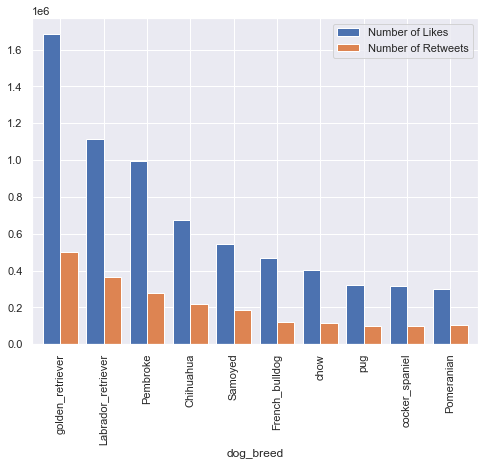

In [218]:
top_ten_likes_retweets.plot(kind= "bar", width = 0.8, figsize = (8, 6));
plt.legend(["Number of Likes", "Number of Retweets"]);

**Answer**: The Golden_retriever had the highest number of likes and retweets followed by the Labrador_retriever.

**Question 2**: 

Which dog breed is the most liked?
(Note: The dog breed with the most likes and retweets per user)

In [129]:
#Question 2:
mean_likes_retweets = master_df.groupby("dog_breed")[["num_likes", "num_retweets"]].mean()
top_ten_mean_likes_retweets = mean_likes_retweets.nlargest(10, ["num_likes", "num_retweets"])

top_ten_mean_likes_retweets

,num_likes,num_retweets
dog_breed,,
Saluki,24060.000000,5133.750000
French_bulldog,17913.000000,4683.923077
Afghan_hound,17326.666667,5976.000000
giant_schnauzer,17314.500000,5161.500000
black-and-tan_coonhound,17012.000000,4164.500000
flat-coated_retriever,16791.625000,4520.250000
Irish_water_spaniel,16400.000000,4500.666667
standard_poodle,15786.000000,6631.857143
English_springer,15657.222222,5973.555556


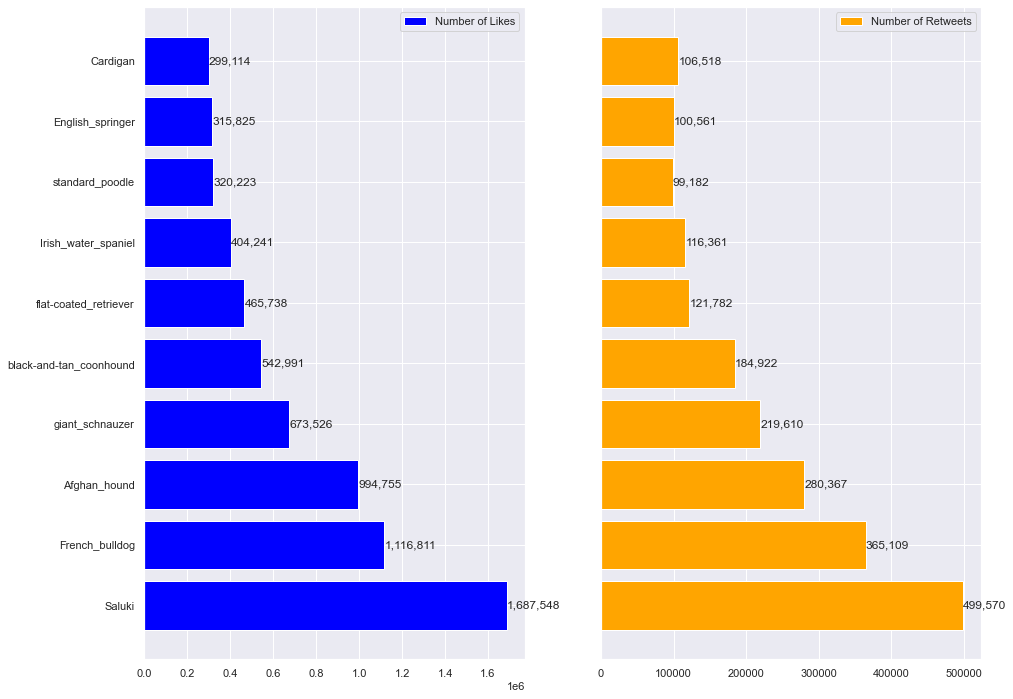

In [476]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize = (15, 12), sharey=True)

ax1.barh(top_ten_mean_likes_retweets.index, width = top_ten_likes_retweets["num_likes"], color = "blue");
ax2.barh(top_ten_mean_likes_retweets.index, width = top_ten_likes_retweets["num_retweets"], color = "orange");
ax1.legend(["Number of Likes"])
ax2.legend(["Number of Retweets"])
    
for p in ax1.patches:
    width = p.get_width()
    ax1.text(p.get_width(), p.get_y()+0.5*p.get_height(),
             '{:,}'.format(width),
             ha='left', va='center')
    
    
for p in ax2.patches:
    width = p.get_width()
    ax2.text(p.get_width(), p.get_y()+0.5*p.get_height(),
             '{:,}'.format(width),
             ha='left', va='center')

**Answer**: A Saluki is the most liked and retweeted breed per user, followed by the French bulldog

**Question 3**: 

Which dog (with a name) received the most likes and retweets?

In [131]:
popular_dogs = master_df[master_df["dog_name"] != "No Name"].groupby("dog_name")[["num_likes",
                                                                                  "num_retweets"]].max()
top_ten_popular_dogs = popular_dogs.nlargest(11, ["num_likes", "num_retweets"])
top_ten_popular_dogs[top_ten_popular_dogs.index != "No Name"]

,num_likes,num_retweets
dog_name,,
Duddles,107956,45849
Stephan,107015,56625
Jamesy,106827,32883
Bo,95450,42228
Zoey,85011,27680
Lilly,73397,19297
Aja,71144,17300
Canela,69871,18781
Earl,68152,16439


In [132]:
master_df[master_df["num_likes"] == 107956]

,tweet_id,date_and_time,source,tweet,tweet_url,rating_numerator,rating_denominator,dog_name,dog_pic_url,number_of_pics,dog_breed,dog_prediction_certainty,num_likes,num_retweets,tweet_length,dog_stage,new_rating
51,879415818425184262,2017-06-26 19:07:24+00:00,Twitter for iPhone,This is Duddles. He did an attempt. 13/10 someone help him (vid by Georgia Felici) https://t.co/UDT7ZkcTgY,https://twitter.com/dog_rates/status/879415818425184262/video/1,13.0,10.0,Duddles,https://pbs.twimg.com/ext_tw_video_thumb/879415784908390401/pu/img/cX7XI1TnUsseGET5.jpg,1,English_springer,0.383404,107956,45849,82,NaN,13/10


In [133]:
master_df[master_df["dog_name"] == "Stephan"]

,tweet_id,date_and_time,source,tweet,tweet_url,rating_numerator,rating_denominator,dog_name,dog_pic_url,number_of_pics,dog_breed,dog_prediction_certainty,num_likes,num_retweets,tweet_length,dog_stage,new_rating
323,807106840509214720,2016-12-09 06:17:20+00:00,Twitter for iPhone,This is Stephan. He just wants to help. 13/10 such a good boy https://t.co/DkBYaCAg2d,https://twitter.com/dog_rates/status/807106840509214720/video/1,13.0,10.0,Stephan,https://pbs.twimg.com/ext_tw_video_thumb/807106774843039744/pu/img/8XZg1xW35Xp2J6JW.jpg,1,Chihuahua,0.50537,107015,56625,61,NaN,13/10


In [134]:
#Creating the image mask to be used for the word cloud
image_mask = np.array(Image.open("./dog_image.PNG"))

In [135]:
#Reset the popular dogs index to add the dog_breed index to the columns of the dataset
popular_dogs = popular_dogs.reset_index()

In [136]:
#Create word cloud for each dog name based on number of likes they get by multiplying the string name by integer number of likes
#The division by 1000 helps to save memory
popular_dogs["word_cloud_column"]=(popular_dogs["dog_name"].apply(lambda x:x+ " "))*(popular_dogs["num_likes"]/1000).astype(int)

In [137]:
#Bringing all the mini word clouds together to form a large corpus
word_cloud_df = pd.DataFrame({'word_cloud_column': [', '.join(popular_dogs['word_cloud_column'].str.strip('"').tolist())]})
word_cloud_df

word_cloud_column
0  Abby Abby Abby Abby Abby Abby , Ace Ace Ace , Acro , Adele Adele Adele , Aiden , Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja Aja , Akumi Akumi Akumi Akumi Akumi Akumi Akumi Akumi Akumi Akumi , , Aldrick Aldrick Aldrick , Alejandro , Alexander Alexander Alexander Alexander Alexander Alexander Alexander Alexander Alexander Alexander Alexander Alexander Alexander , Alexanderson Alexanderson , Alf Alf Alf Alf Alf Alf Alf Alf Alf , Alfie Alfie Alfie Alfie Alfie Alfie Alfie Alfie Alfie Alfie Alfie Alfie Alfie Alfie , , , Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy Alfy , Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice Alice , Amber Amber Amber , Ambrose Ambrose Ambrose Ambrose , , , Andy , Angel Angel Angel Angel , Anna Anna Anna Anna Anna Anna Anna Anna , Apollo Apollo Apollo , Aqua Aqua Aqua Aqua Aqua Aqua Aqua Aqua , Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie Archie , Arlen Arlen Arlen , Arlo Arlo Arlo Arlo Arlo Arlo Arlo Arlo Arlo Arlo Arlo Arlo , Arnie Arnie Arnie Arnie Arnie Arnie Arnie Arnie Arnie Arnie Arnie Arnie Arnie Arnie , Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya Arya , Ash Ash Ash Ash Ash Ash Ash Ash Ash Ash Ash Ash Ash Ash Ash Ash Ash , Ashleigh Ashleigh Ashleigh Ashleigh Ashleigh , Aspen Aspen Aspen Aspen Aspen Aspen Aspen Aspen Aspen Aspen Aspen Aspen Aspen Aspen Aspen , Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid Astrid , Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas Atlas , Atticus Atticus Atticus Atticus Atticus , Aubie Aubie Aubie Aubie Aubie Aubie Aubie , Augie Augie Augie Augie Augie Augie Augie Augie Augie Augie Augie Augie Augie Augie , Autumn Autumn Autumn Autumn Autumn Autumn Autumn Autumn Autumn Autumn Autumn Autumn Autumn , Ava , Axel Axel Axel Axel Axel Axel Axel Axel Axel , Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey Bailey , , Banjo Banjo , Barclay Barclay , Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney Barney , Baron Baron Baron Baron Baron Baron Baron Baron Baron Baron , Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer Bauer , Baxter Baxter Baxter Baxter Baxter Baxter , Bayley Bayley Bayley Bayley Bayley , BeBe BeBe BeBe BeBe BeBe BeBe BeBe BeBe BeBe BeBe BeBe BeBe BeBe BeBe BeBe , Bear Bear Bear Bear Bear Bear Bear Bear Bear Bear , Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau Beau , Beebop Beebop Beebop Beebop Beebop Beebop Beebop Beebop , Beemo Beemo Beemo Beemo , Bell Bell Bell Bell Bell Bell Bell Bell Bell Bell , Bella Bella Bell

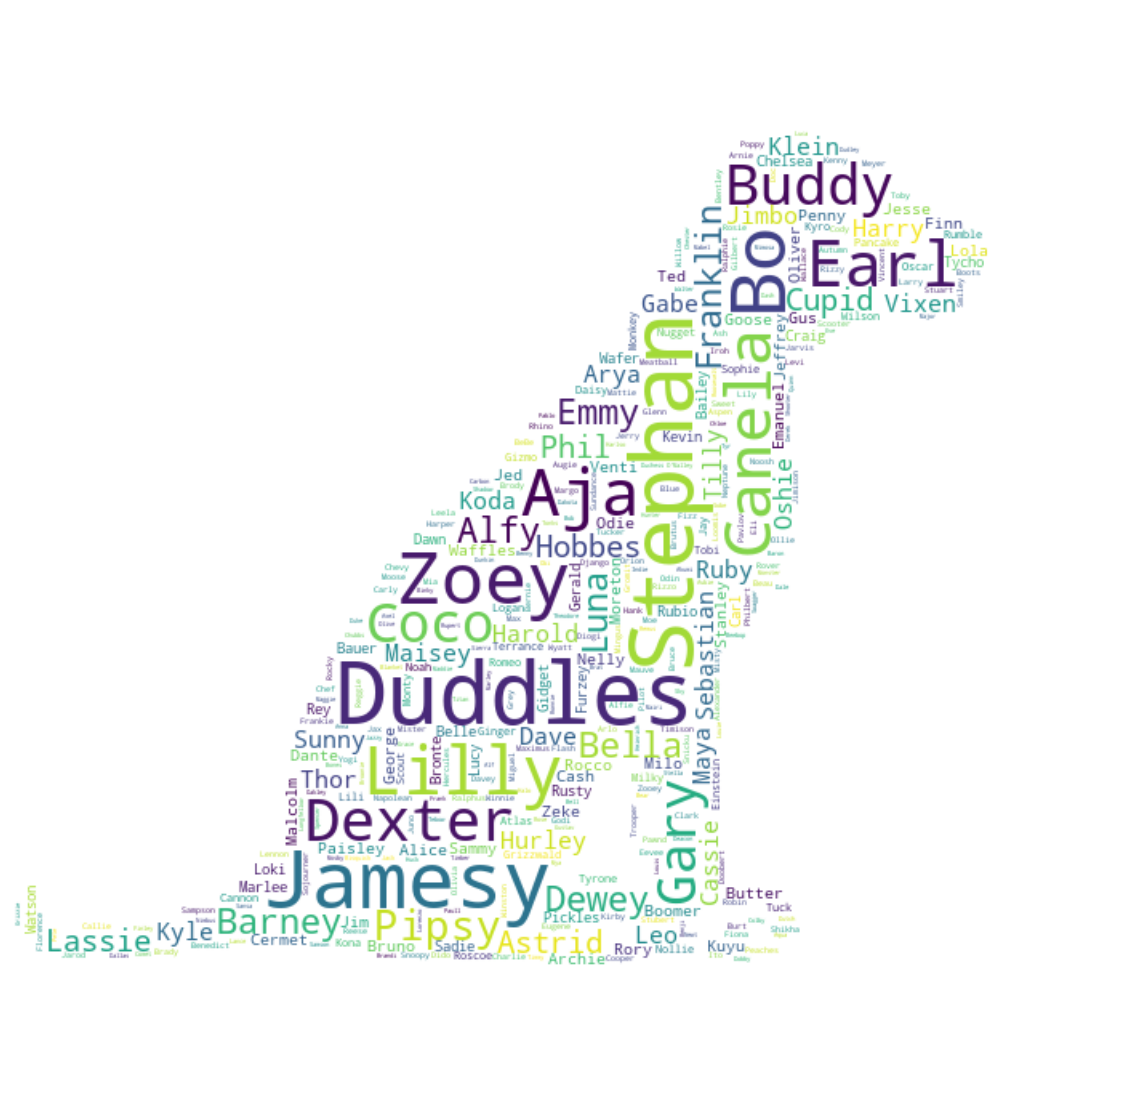

In [216]:
#The following code generates the word cloud
stopwords = {word for word in STOPWORDS if word not in list(word_cloud_df["word_cloud_column"].values[0])}
w_cloud = WordCloud(mask = image_mask,width = 2000, height = 1000, stopwords= stopwords, collocations = False,
                   max_words= 2000, background_color= "White")

w_cloud.generate(word_cloud_df["word_cloud_column"].values[0])
plt.figure(figsize = (20, 20))
plt.imshow(w_cloud, interpolation= "bilinear")
plt.axis("off")
plt.show()

**Answer**: Duddles is the most liked dog if you use the full dataset from Udacity but Stephan is the most liked dog if you use the Twitter API data

**Question 4**:

What dog breed is the most popular?

This attempts to answer the question of which breed a lot of people have access to which correlates with which breed is most owned

In [182]:
dog_breed_popularity = master_df["dog_breed"].value_counts()

In [176]:
dog_breed_popularity

golden_retriever      136
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
                     ... 
silky_terrier           1
clumber                 1
standard_schnauzer      1
EntleBucher             1
Scotch_terrier          1
Name: dog_breed, Length: 111, dtype: int64

In [179]:
dog_breed_popularity.nlargest(10)

golden_retriever      136
Labrador_retriever     94
Pembroke               88
Chihuahua              78
pug                    54
chow                   41
Samoyed                40
Pomeranian             38
toy_poodle             37
malamute               29
Name: dog_breed, dtype: int64

In [ ]:
ranger = range(1, len(dog_breed_popularity.nlargest(20)) + 1)
dog_breed_popularity = dog_breed_popularity.sort_values(ascending = False)

In [180]:
twenty_popular_dog_breeds = dog_breed_popularity.nlargest(20)

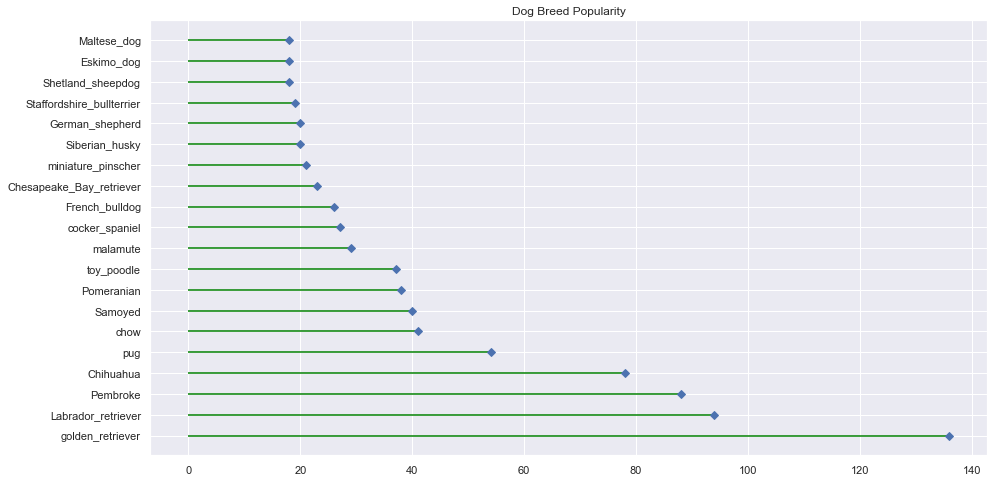

In [526]:
plt.figure(figsize = (15, 8))
plt.hlines(y = ranger, xmin = 0, xmax =twenty_popular_dog_breeds, color = "green")
plt.plot(twenty_popular_dog_breeds, ranger, "D")
plt.yticks(ranger, twenty_popular_dog_breeds.index)
plt.title("Dog Breed Popularity")
plt.show()


**Answer**: The most popular breed is the Golden Retriever.

**Question 5**: 

Is there any relationship between the ratings with likes and retweets?

<Figure size 2160x720 with 0 Axes>

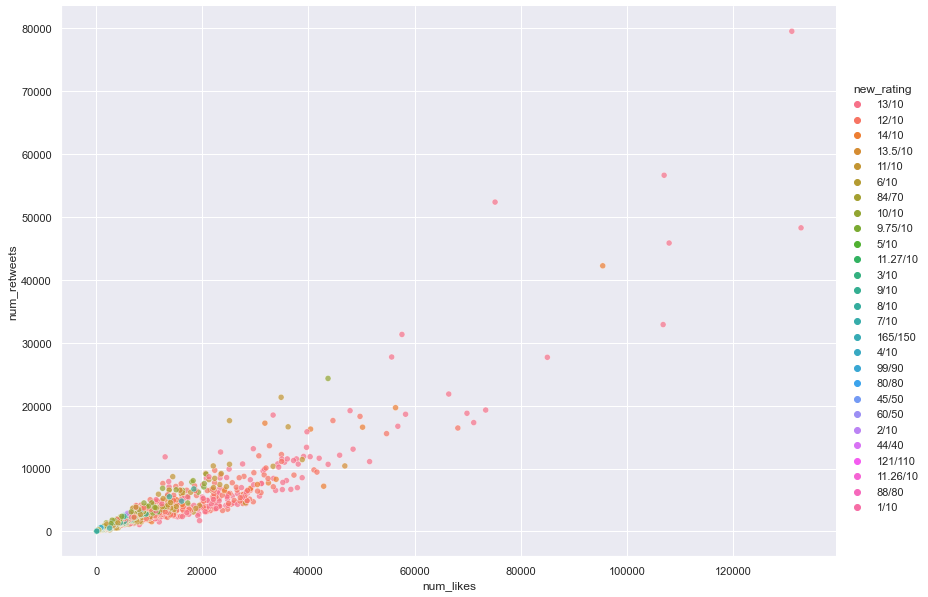

In [525]:
#plt.scatter(master_df["num_likes"], master_df["num_retweets"])
plt.figure(figsize = (30, 10))
ratings = ["6/10", "14/10", "7/10", "8/10", "9/10", "13/10", "11/10", "10/10", "12/10"]
sns.relplot(data = master_df, x = "num_likes", y = "num_retweets", hue = "new_rating", height=8.27, aspect=11.7/8.27,
           alpha = 0.7)

In [191]:
likes_retweets_relation = master_df.groupby(["new_rating"])[["num_likes", "num_retweets"]].sum()

In [206]:
likes_retweets_relation.sort_values("num_likes")

,num_likes,num_retweets
new_rating,,
1/10,265,79
11.26/10,1879,542
80/80,2529,636
45/50,2634,721
88/80,2927,1460
99/90,3062,829
60/50,3201,1028
44/40,3748,1552
121/110,4225,1563


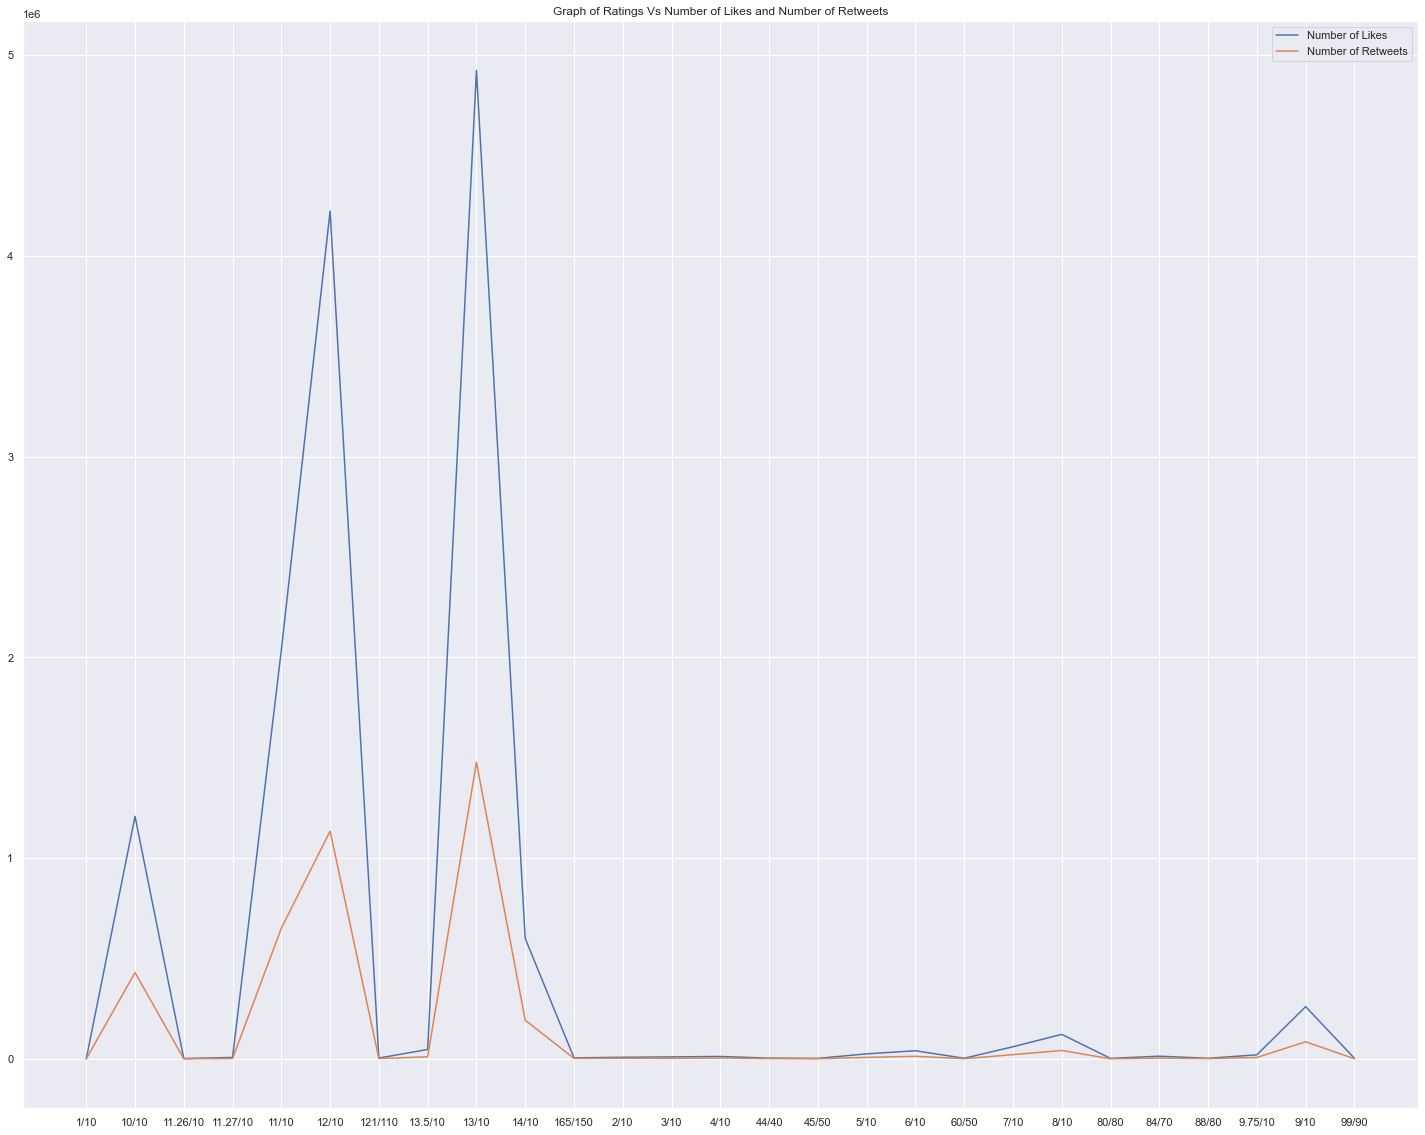

In [214]:
plt.figure(figsize = (25, 20))
plt.plot(likes_retweets_relation.index, likes_retweets_relation["num_likes"])
plt.plot(likes_retweets_relation.index, likes_retweets_relation["num_retweets"])
plt.title("Graph of Ratings Vs Number of Likes and Number of Retweets")
plt.legend(["Number of Likes", "Number of Retweets"])

**Answer**: There is a relationship between Number of Likes and Number of Retweets. However the relationship of these two variables with rating seems to stop at 13/10 and only with the integer values. The higher the rating, the more the likes and retweets.

**Question 6**: 

What times did the tweets come in?

<AxesSubplot:>

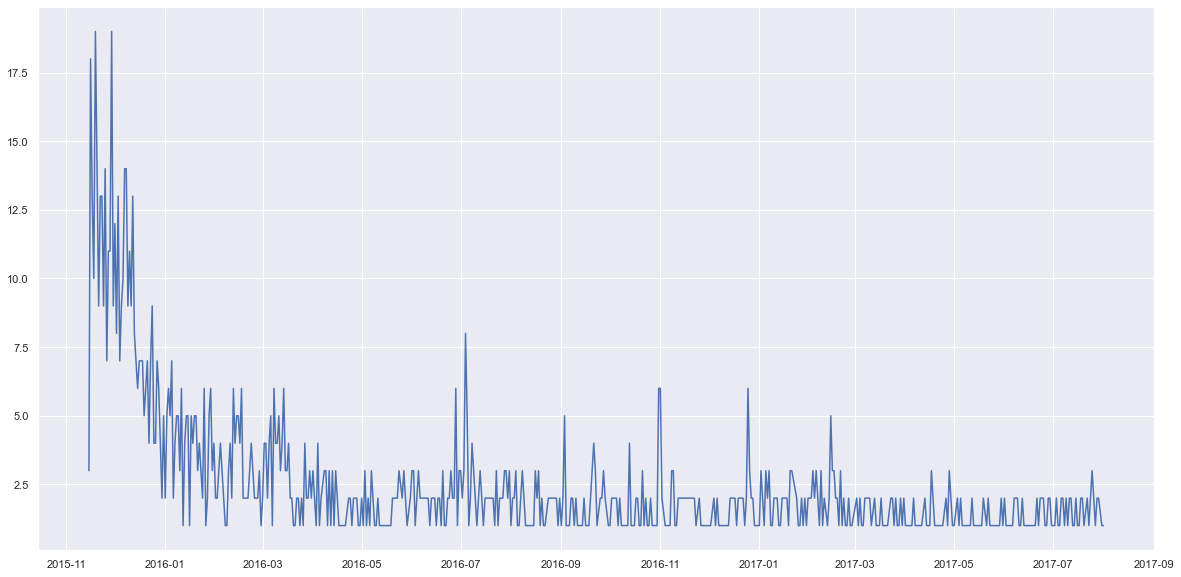

In [253]:
master_df["date_and_time"].dt.date.value_counts().plot(figsize = (20,10))

In [269]:
datetime_df = master_df["date_and_time"].dt.day_name().value_counts().to_frame().reset_index()
datetime_df = datetime_df.rename(columns = {"index": "Day", "date_and_time": "Count"})
datetime_df

,Day,Count
0,Monday,234
1,Thursday,218
2,Tuesday,213
3,Friday,210
4,Wednesday,206
5,Sunday,197
6,Saturday,184


In [279]:
day_categories = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

sortdays = dict(zip(day_categories, range(len(day_categories))))
sortdays

{'Monday': 0,
 'Tuesday': 1,
 'Wednesday': 2,
 'Thursday': 3,
 'Friday': 4,
 'Saturday': 5,
 'Sunday': 6}

In [277]:
datetime_df["Day"]

0       Monday
1     Thursday
2      Tuesday
3       Friday
4    Wednesday
5       Sunday
6     Saturday
Name: Day, dtype: category
Categories (7, object): ['Monday' < 'Tuesday' < 'Wednesday' < 'Thursday' < 'Friday' < 'Saturday' < 'Sunday']

In [395]:
datetime_df["day_id"] = datetime_df.index
datetime_df["day_id"] = datetime_df["Day"].map(sortdays)
datetime_df.sort_values("day_id", inplace = True)
datetime_df

,Day,Count,day_id
0,Monday,234,0
2,Tuesday,213,1
4,Wednesday,206,2
1,Thursday,218,3
3,Friday,210,4
6,Saturday,184,5
5,Sunday,197,6


In [397]:
import matplotlib as mp

data_normalizer = mp.colors.Normalize()
data_normalizer
color_map = mp.colors.LinearSegmentedColormap(
    "my_map",
    {
        "red": [(0, 1.0, 1.0),
                (1.0, .5, .5)],
        "green": [(0, 0.5, 0.5),
                  (1.0, 0, 0)],
        "blue": [(0, 0.50, 0.5),
                 (1.0, 0, 0)]
    }
)

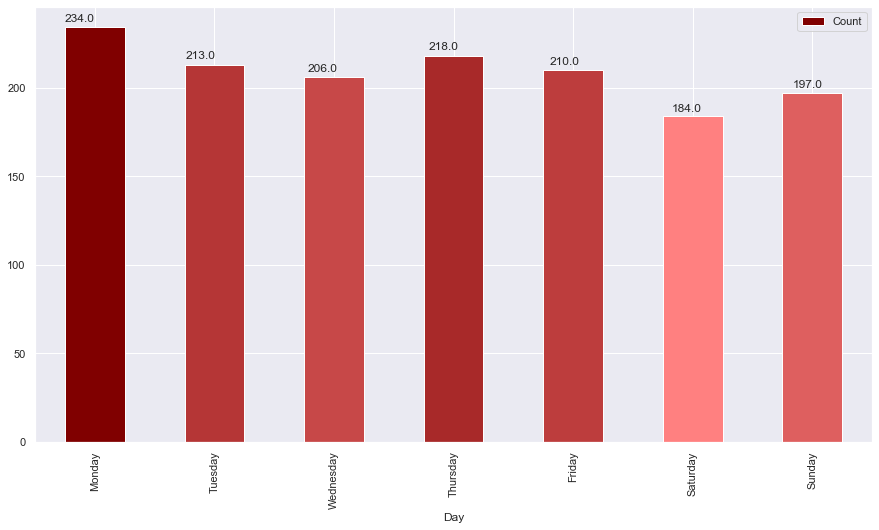

In [398]:
ax = datetime_df.plot.bar(x = "Day", y = "Count", figsize = (15, 8),  color=color_map(data_normalizer(datetime_df["Count"])))
ax.legend(bbox_to_anchor=(1.0, 1.0))
for p in ax.patches:
    ax.annotate("{:.1f}".format(p.get_height()), xy=(p.get_x() * 1.015, p.get_height() * 1.015))

**Answer**: 

1. The highest traffic received was from November 2015
2. People voted more on Monday than any other days. In fact, the weekends had the lower number of votes.

In [339]:
dar = np.array([1,2,3,4,5])
dar[::-1]

array([5, 4, 3, 2, 1])

**Question 7**: 

The prediction distribution showing how well the machine learning algorithm did

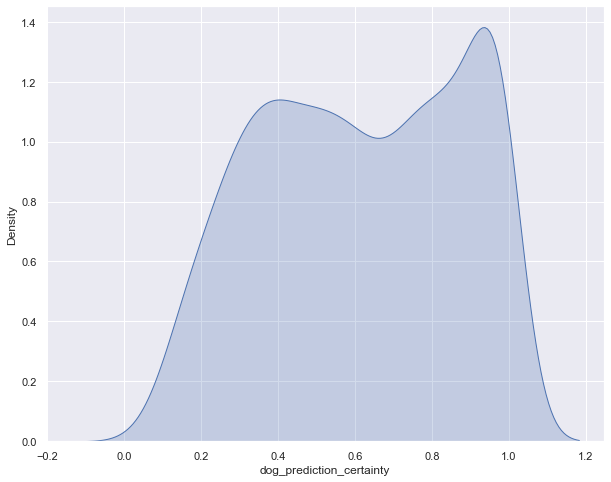

In [492]:
plt.figure(figsize = (10,8))
seaborn_plotter = sns.kdeplot(master_df["dog_prediction_certainty"], shade = True)
#seaborn_plotter.set_xlim(left = 0, right = 1)

In [495]:
'The average accuracy of the predictions is: {:.2f}%'.format(master_df["dog_prediction_certainty"].mean()*100)

'The average accuracy of the predictions is: 61.49%'

**Answer**: 

1. The machine learning algorithm did fairly well with an average accuracy of 61.49%. 
2. However, the bimodal distribution indicates that there were a set of pictures that the prediction algorithm did really well on and another set, where it did not do so well. 

This could perhaps be due to some pictures having some other objects central to the image causing some confusion for the machine learning algorithm.

In [489]:
#We can do a quick check of the pictures with prediction accuracy less than the lower mode of around 40%
master_df.query("dog_prediction_certainty <0.40").loc[:, ["tweet_id", "dog_pic_url", "dog_breed", "dog_prediction_certainty"]].sample(3)

,tweet_id,dog_pic_url,dog_breed,dog_prediction_certainty
222,828408677031882754,https://pbs.twimg.com/media/C38ZSzlWIAEpQzs.jpg,Weimaraner,0.133033
865,699036661657767936,https://pbs.twimg.com/media/CbN6IW4UYAAyVDA.jpg,Chihuahua,0.222943
377,793180763617361921,https://pbs.twimg.com/media/CwHxsdYVMAAqGCJ.jpg,Lakeland_terrier,0.266824


**Question 8**: 

How are retweets and likes related?

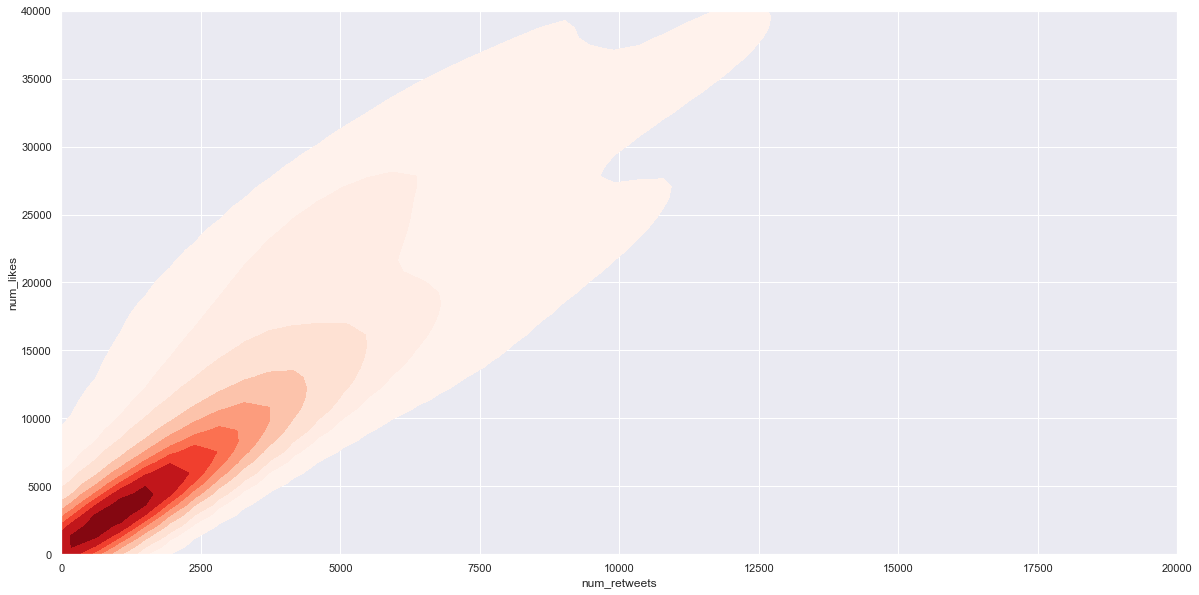

In [454]:
plt.figure(figsize = (20, 10))
seaborn_plotter = sns.kdeplot(data = master_df, color='r', shade=True,
            x = "num_retweets", y = "num_likes", cmap="Reds", thresh=0.05)

seaborn_plotter.set_xlim(left=0, right=20_000)
seaborn_plotter.set_ylim(bottom=0, top=40_000);